## EXP_2389_seq_prune_0_4_64_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [3]:
exp_dict = OrderedDict()

#### Get MNIST data

In [4]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
round0 [8 3 9 2]
8
Epoch 1/5
1250/1250 - 2s - loss: 0.0589 - accuracy: 0.9786 - val_loss: 0.0500 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 2s - loss: 0.0118 - accuracy: 0.9959 - val_loss: 0.0639 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 2s - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.1354 - val_accuracy: 0.9706
Epoch 4/5
1250/1250 - 2s - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.0737 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 2s - loss: 7.4359e-04 - accuracy: 0.9997 - val_loss: 0.0677 - val_accuracy: 0.9882


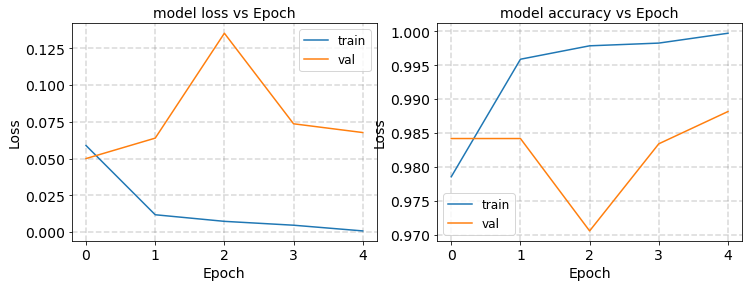

3
Epoch 1/5
1250/1250 - 2s - loss: 0.0890 - accuracy: 0.9775 - val_loss: 0.0742 - val_accuracy: 0.9763
Epoch 2/5
1250/1250 - 2s - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0876 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 2s - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0727 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 2s - loss: 3.1159e-04 - accuracy: 0.9999 - val_loss: 0.1019 - val_accuracy: 0.9851
Epoch 5/5
1250/1250 - 2s - loss: 2.3911e-05 - accuracy: 1.0000 - val_loss: 0.1146 - val_accuracy: 0.9858


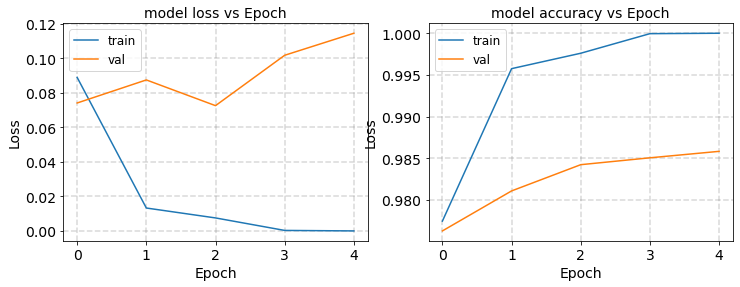

9
Epoch 1/5
1250/1250 - 2s - loss: 0.0746 - accuracy: 0.9861 - val_loss: 0.0360 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 2s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0552 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0495 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 2s - loss: 0.0023 - accuracy: 0.9990 - val_loss: 0.0843 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 2s - loss: 3.2411e-04 - accuracy: 0.9999 - val_loss: 0.0714 - val_accuracy: 0.9914


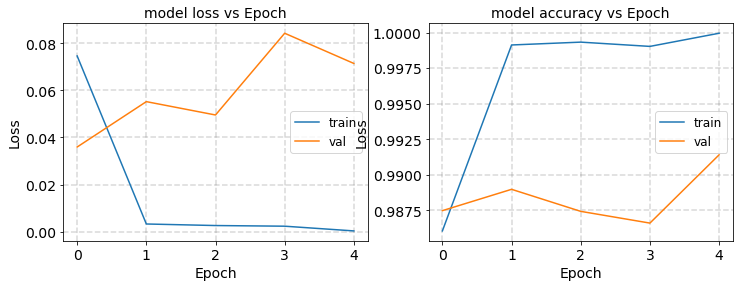

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0904 - accuracy: 0.9849 - val_loss: 0.0316 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 2s - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0350 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0891 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 2s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0866 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 2s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0362 - val_accuracy: 0.9937


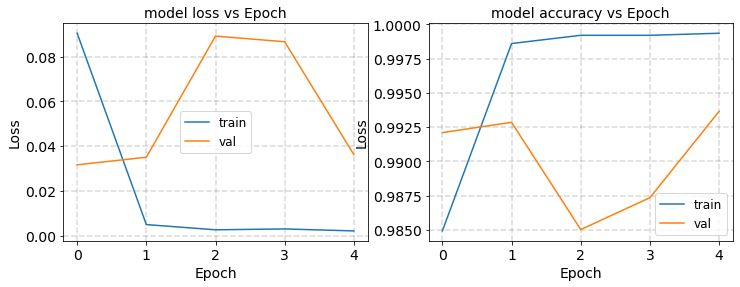

round1 [8 9 3 2]
8
Epoch 1/5
1250/1250 - 2s - loss: 0.1089 - accuracy: 0.9704 - val_loss: 0.1323 - val_accuracy: 0.9668
Epoch 2/5
1250/1250 - 1s - loss: 0.0165 - accuracy: 0.9959 - val_loss: 0.0783 - val_accuracy: 0.9780
Epoch 3/5
1250/1250 - 1s - loss: 0.0083 - accuracy: 0.9979 - val_loss: 0.1009 - val_accuracy: 0.9811
Epoch 4/5
1250/1250 - 2s - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.1164 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 2s - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.1563 - val_accuracy: 0.9786


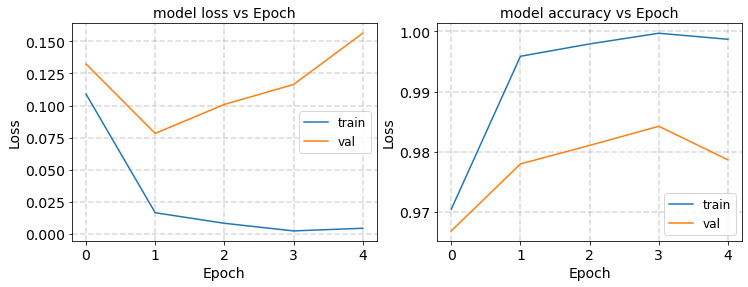

9
Epoch 1/5
1250/1250 - 2s - loss: 0.0884 - accuracy: 0.9753 - val_loss: 0.0577 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 1s - loss: 0.0098 - accuracy: 0.9963 - val_loss: 0.0682 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 2s - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.1047 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 2s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.1369 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 2s - loss: 8.1735e-04 - accuracy: 0.9998 - val_loss: 0.1098 - val_accuracy: 0.9874


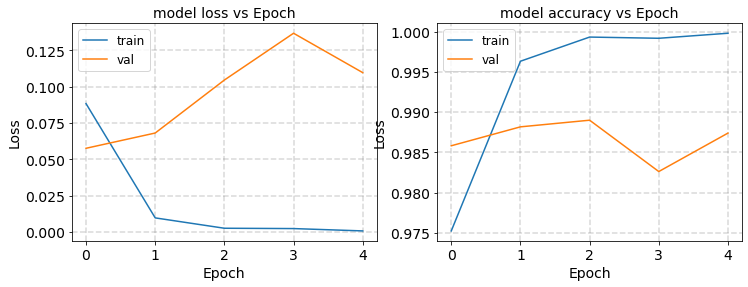

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1273 - accuracy: 0.9743 - val_loss: 0.0800 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 2s - loss: 0.0166 - accuracy: 0.9952 - val_loss: 0.1419 - val_accuracy: 0.9787
Epoch 3/5
1250/1250 - 2s - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.1451 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 2s - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.1272 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 2s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.1477 - val_accuracy: 0.9810


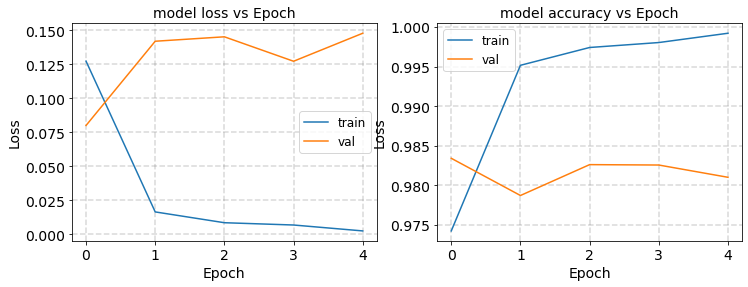

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0690 - accuracy: 0.9876 - val_loss: 0.0485 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 2s - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0651 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 2s - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0701 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 2s - loss: 1.0353e-04 - accuracy: 1.0000 - val_loss: 0.0773 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 3.7401e-05 - accuracy: 1.0000 - val_loss: 0.0844 - val_accuracy: 0.9873


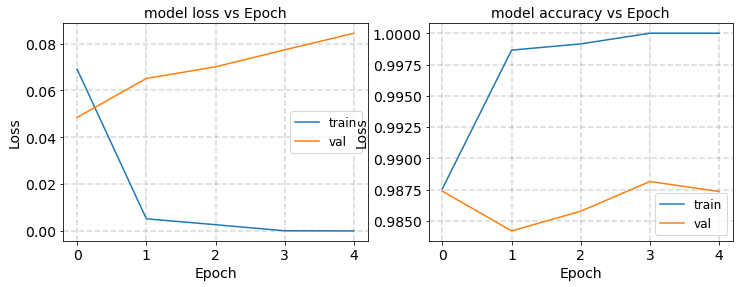

round2 [2 8 3 9]
2
Epoch 1/5
1250/1250 - 2s - loss: 1.5754e-05 - accuracy: 1.0000 - val_loss: 0.0916 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 2s - loss: 6.9710e-06 - accuracy: 1.0000 - val_loss: 0.0982 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 2s - loss: 3.0016e-06 - accuracy: 1.0000 - val_loss: 0.1061 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 2s - loss: 1.3018e-06 - accuracy: 1.0000 - val_loss: 0.1143 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 5.5139e-07 - accuracy: 1.0000 - val_loss: 0.1169 - val_accuracy: 0.9897


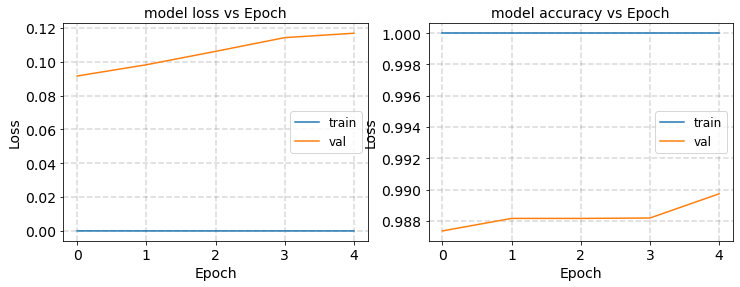

8
Epoch 1/5
1250/1250 - 2s - loss: 0.1376 - accuracy: 0.9779 - val_loss: 0.0779 - val_accuracy: 0.9787
Epoch 2/5
1250/1250 - 2s - loss: 0.0141 - accuracy: 0.9961 - val_loss: 0.0889 - val_accuracy: 0.9787
Epoch 3/5
1250/1250 - 2s - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.1188 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 2s - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.1251 - val_accuracy: 0.9786
Epoch 5/5
1250/1250 - 1s - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.1095 - val_accuracy: 0.9826


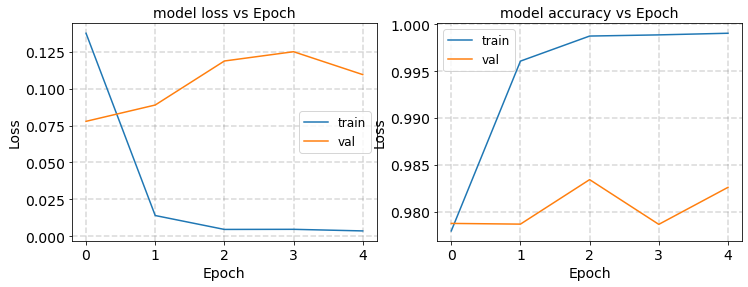

3
Epoch 1/5
1250/1250 - 2s - loss: 0.0933 - accuracy: 0.9821 - val_loss: 0.0861 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 2s - loss: 0.0040 - accuracy: 0.9985 - val_loss: 0.1310 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 2s - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.1505 - val_accuracy: 0.9810
Epoch 4/5
1250/1250 - 2s - loss: 5.0894e-05 - accuracy: 1.0000 - val_loss: 0.1666 - val_accuracy: 0.9802
Epoch 5/5
1250/1250 - 2s - loss: 1.7626e-05 - accuracy: 1.0000 - val_loss: 0.1812 - val_accuracy: 0.9802


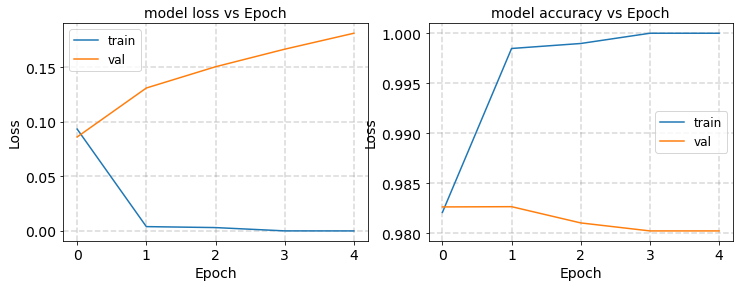

9
Epoch 1/5
1250/1250 - 2s - loss: 0.0758 - accuracy: 0.9887 - val_loss: 0.0600 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 2s - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0817 - val_accuracy: 0.9843
Epoch 3/5
1250/1250 - 2s - loss: 7.1227e-04 - accuracy: 0.9998 - val_loss: 0.0968 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 2s - loss: 4.2412e-05 - accuracy: 1.0000 - val_loss: 0.1100 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 2s - loss: 1.6255e-05 - accuracy: 1.0000 - val_loss: 0.1181 - val_accuracy: 0.9866


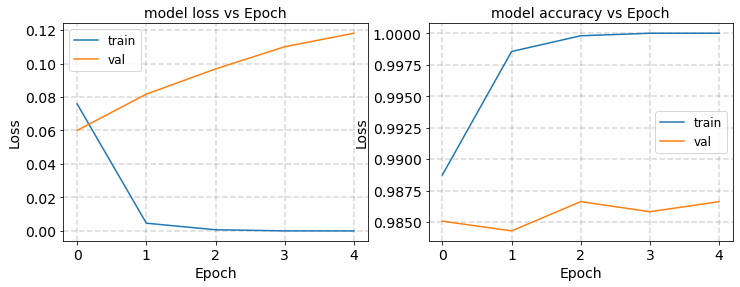

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
__________________________________________________

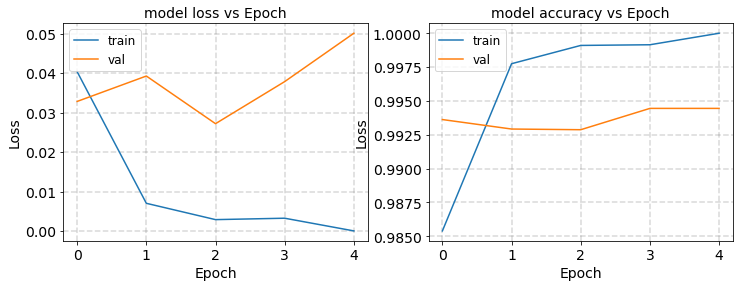

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0789 - accuracy: 0.9787 - val_loss: 0.0629 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 3s - loss: 0.0120 - accuracy: 0.9966 - val_loss: 0.0791 - val_accuracy: 0.9779
Epoch 3/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0826 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 4s - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0762 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0984 - val_accuracy: 0.9850


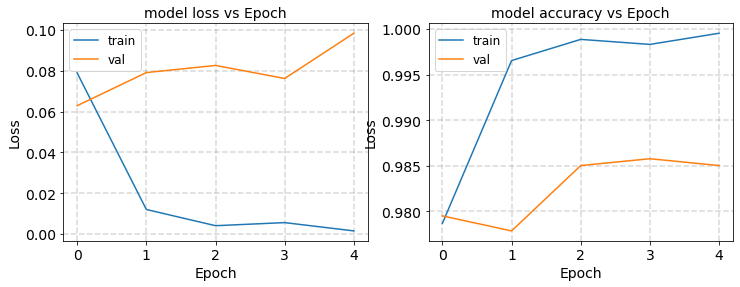

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0849 - accuracy: 0.9765 - val_loss: 0.0619 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0698 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 3s - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0873 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0956 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 3s - loss: 6.0196e-05 - accuracy: 1.0000 - val_loss: 0.1132 - val_accuracy: 0.9834


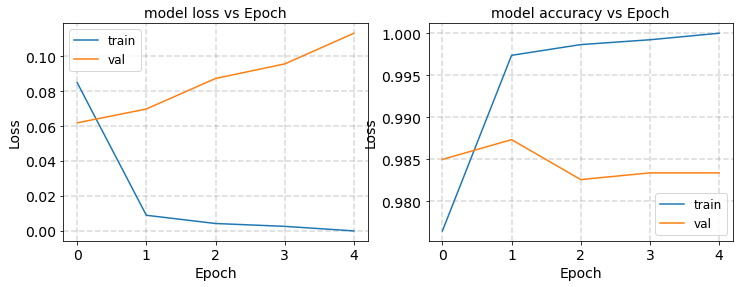

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0650 - accuracy: 0.9861 - val_loss: 0.0690 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0108 - accuracy: 0.9962 - val_loss: 0.0562 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 3s - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0559 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0874 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 4.9004e-04 - accuracy: 0.9999 - val_loss: 0.0946 - val_accuracy: 0.9882


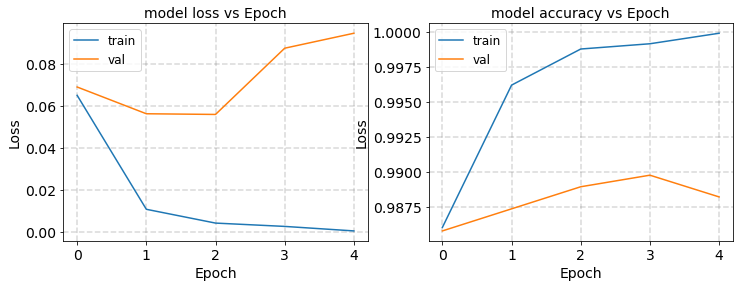

round1 [2 9 3 8]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.1186 - accuracy: 0.9826 - val_loss: 0.0426 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0523 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 3s - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0588 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 1.5351e-04 - accuracy: 1.0000 - val_loss: 0.0743 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 3s - loss: 1.4823e-05 - accuracy: 1.0000 - val_loss: 0.0894 - val_accuracy: 0.9897


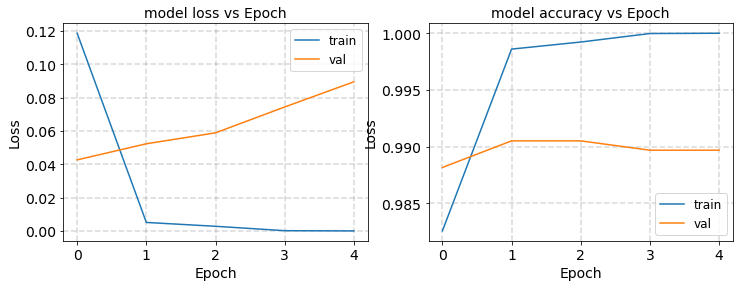

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0943 - accuracy: 0.9787 - val_loss: 0.0508 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 2s - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0537 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0713 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 5.3063e-04 - accuracy: 0.9999 - val_loss: 0.1025 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 2.0521e-05 - accuracy: 1.0000 - val_loss: 0.1158 - val_accuracy: 0.9898


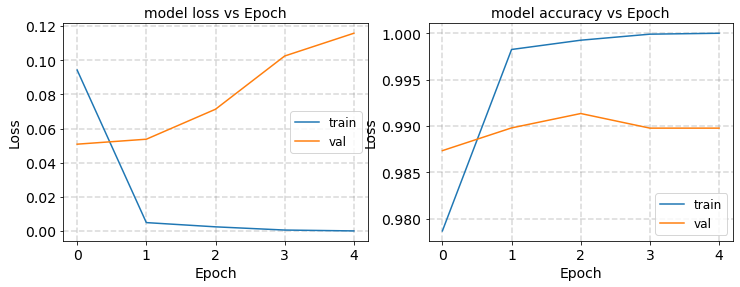

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1238 - accuracy: 0.9716 - val_loss: 0.0696 - val_accuracy: 0.9763
Epoch 2/5
1250/1250 - 3s - loss: 0.0191 - accuracy: 0.9942 - val_loss: 0.0607 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 2s - loss: 0.0091 - accuracy: 0.9976 - val_loss: 0.0829 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 3s - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.1049 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 2s - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.1142 - val_accuracy: 0.9818


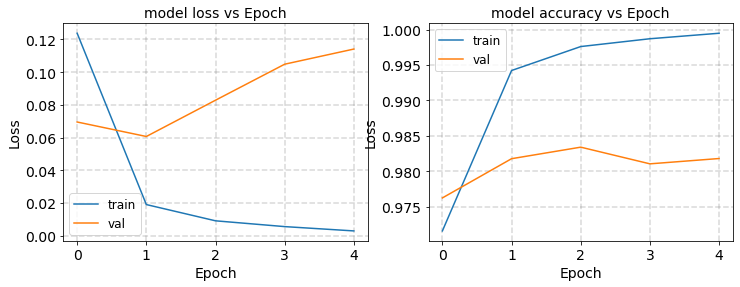

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0928 - accuracy: 0.9739 - val_loss: 0.0731 - val_accuracy: 0.9779
Epoch 2/5
1250/1250 - 2s - loss: 0.0140 - accuracy: 0.9965 - val_loss: 0.0882 - val_accuracy: 0.9795
Epoch 3/5
1250/1250 - 2s - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.1083 - val_accuracy: 0.9756
Epoch 4/5
1250/1250 - 2s - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.0911 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 2s - loss: 3.6487e-04 - accuracy: 0.9999 - val_loss: 0.1028 - val_accuracy: 0.9819


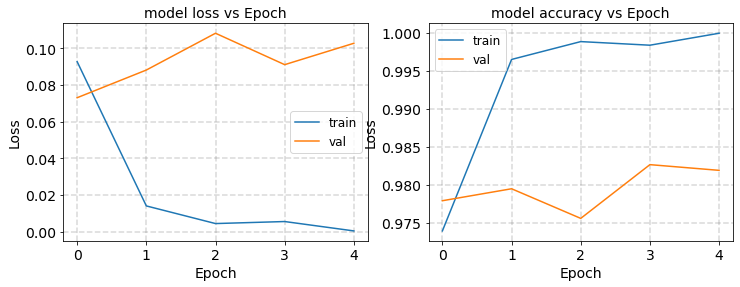

round2 [2 9 8 3]
2
Epoch 1/5
1250/1250 - 2s - loss: 0.0780 - accuracy: 0.9850 - val_loss: 0.0538 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 2s - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0694 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 2s - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0477 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 2s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0666 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9991 - val_loss: 0.0611 - val_accuracy: 0.9897


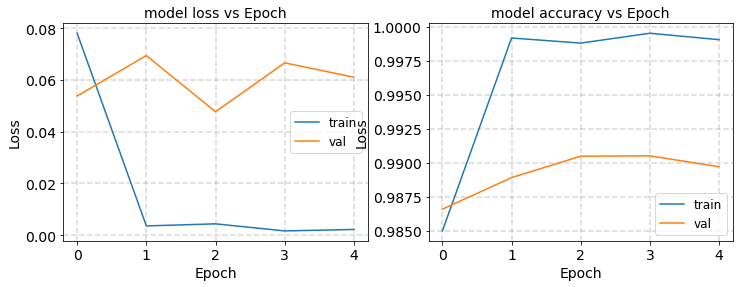

9
Epoch 1/5
1250/1250 - 2s - loss: 0.0822 - accuracy: 0.9845 - val_loss: 0.0550 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 2s - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0518 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 2s - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0504 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 2s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0715 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 2s - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0496 - val_accuracy: 0.9881


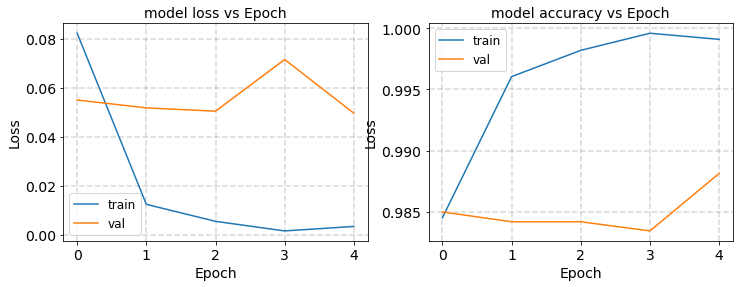

8
Epoch 1/5
1250/1250 - 2s - loss: 0.0830 - accuracy: 0.9820 - val_loss: 0.0721 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 2s - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.1015 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 2s - loss: 5.2475e-04 - accuracy: 0.9999 - val_loss: 0.1020 - val_accuracy: 0.9833
Epoch 4/5
1250/1250 - 2s - loss: 6.2188e-05 - accuracy: 1.0000 - val_loss: 0.1213 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 2s - loss: 1.5072e-05 - accuracy: 1.0000 - val_loss: 0.1328 - val_accuracy: 0.9826


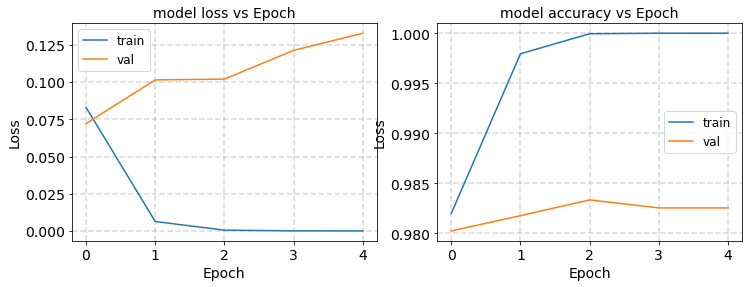

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1211 - accuracy: 0.9782 - val_loss: 0.0731 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 2s - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0839 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 2s - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0969 - val_accuracy: 0.9802
Epoch 4/5
1250/1250 - 2s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1007 - val_accuracy: 0.9817
Epoch 5/5
1250/1250 - 2s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.1012 - val_accuracy: 0.9857


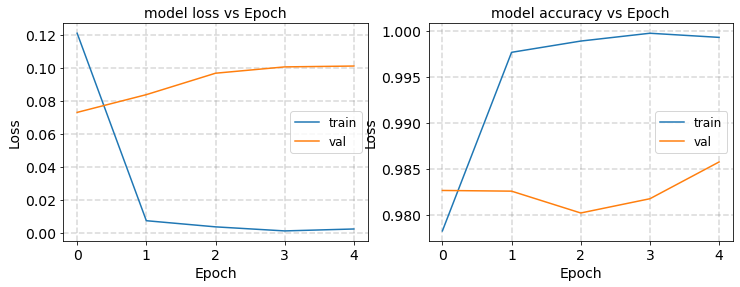

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
__________________________________________________

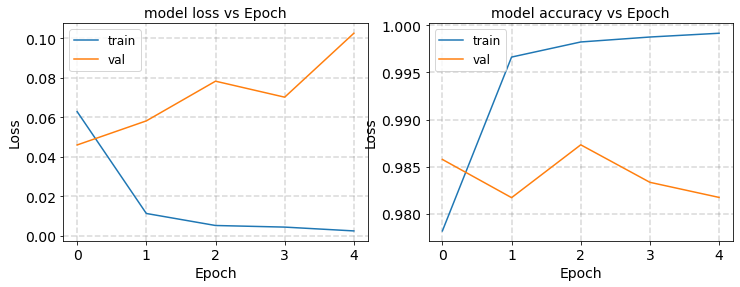

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0636 - accuracy: 0.9858 - val_loss: 0.0249 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0349 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0572 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 4s - loss: 8.5946e-05 - accuracy: 1.0000 - val_loss: 0.0726 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 1.1817e-05 - accuracy: 1.0000 - val_loss: 0.0790 - val_accuracy: 0.9921


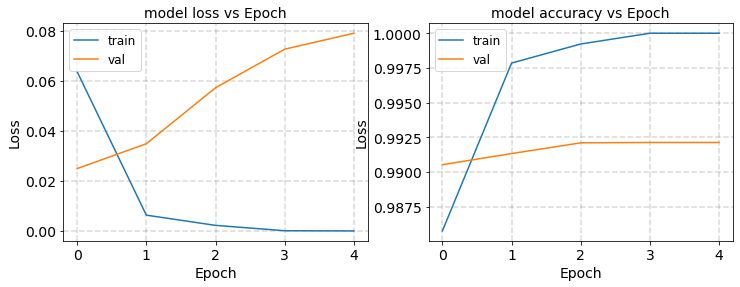

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0924 - accuracy: 0.9798 - val_loss: 0.0395 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 3s - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0380 - val_accuracy: 0.9912
Epoch 3/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0634 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 3s - loss: 2.0094e-04 - accuracy: 0.9999 - val_loss: 0.0553 - val_accuracy: 0.9881
Epoch 5/5
1250/1250 - 3s - loss: 2.3339e-05 - accuracy: 1.0000 - val_loss: 0.0622 - val_accuracy: 0.9873


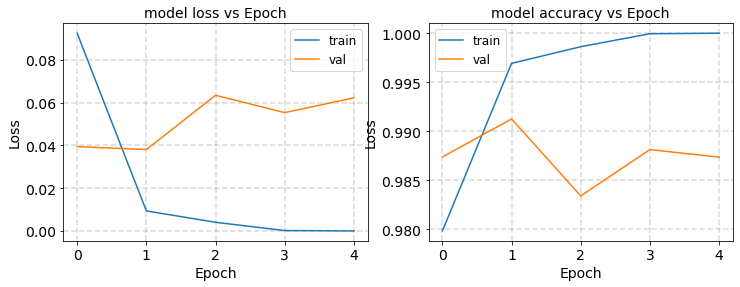

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0801 - accuracy: 0.9852 - val_loss: 0.0348 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0586 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0605 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 6.4310e-04 - accuracy: 0.9998 - val_loss: 0.0731 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 1.5724e-05 - accuracy: 1.0000 - val_loss: 0.0837 - val_accuracy: 0.9921


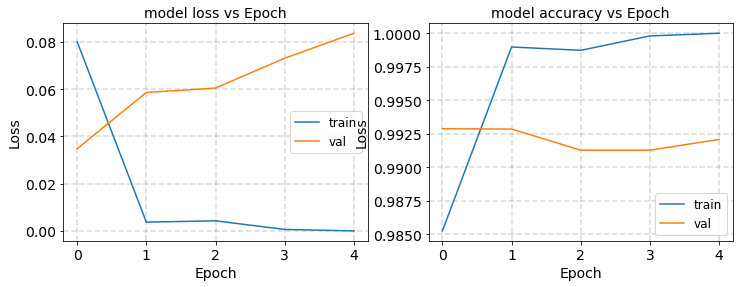

round1 [9 8 3 2]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.0822 - accuracy: 0.9863 - val_loss: 0.0806 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0678 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 3s - loss: 0.0022 - accuracy: 0.9991 - val_loss: 0.0815 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 3s - loss: 4.8611e-05 - accuracy: 1.0000 - val_loss: 0.1182 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 3s - loss: 4.4123e-06 - accuracy: 1.0000 - val_loss: 0.1469 - val_accuracy: 0.9897


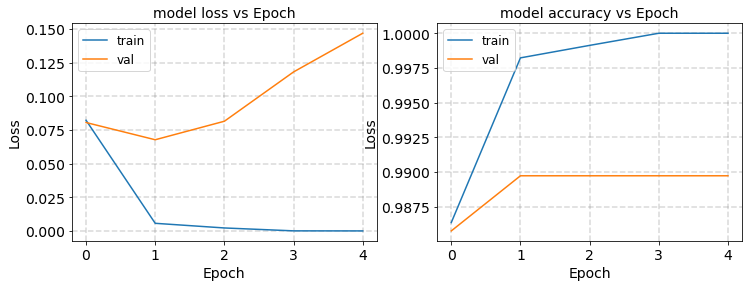

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1171 - accuracy: 0.9752 - val_loss: 0.0617 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0076 - accuracy: 0.9981 - val_loss: 0.0811 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9999 - val_loss: 0.1058 - val_accuracy: 0.9865
Epoch 4/5
1250/1250 - 3s - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.0966 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 3s - loss: 3.3469e-04 - accuracy: 0.9999 - val_loss: 0.1209 - val_accuracy: 0.9850


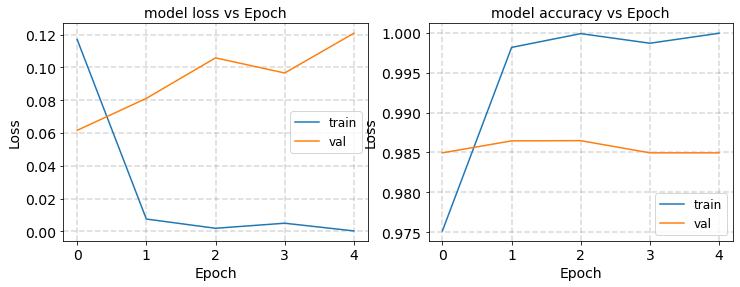

3
Epoch 1/5
1250/1250 - 3s - loss: 0.0985 - accuracy: 0.9780 - val_loss: 0.0665 - val_accuracy: 0.9810
Epoch 2/5
1250/1250 - 2s - loss: 0.0118 - accuracy: 0.9970 - val_loss: 0.0734 - val_accuracy: 0.9849
Epoch 3/5
1250/1250 - 3s - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.0879 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 3s - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0976 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 3s - loss: 5.3581e-04 - accuracy: 0.9998 - val_loss: 0.1164 - val_accuracy: 0.9897


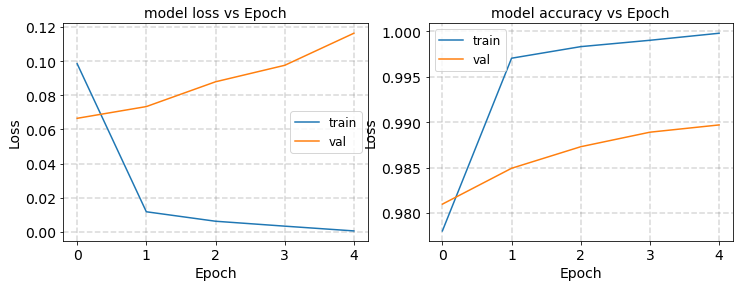

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0919 - accuracy: 0.9790 - val_loss: 0.0611 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 3s - loss: 0.0068 - accuracy: 0.9981 - val_loss: 0.0567 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0588 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 5.9066e-05 - accuracy: 1.0000 - val_loss: 0.0738 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 3s - loss: 2.0118e-05 - accuracy: 1.0000 - val_loss: 0.0817 - val_accuracy: 0.9905


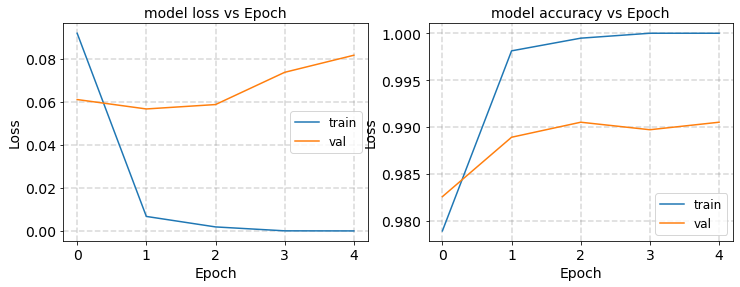

round2 [2 8 9 3]
2
Epoch 1/5
1250/1250 - 3s - loss: 8.7022e-06 - accuracy: 1.0000 - val_loss: 0.0869 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 3.8460e-06 - accuracy: 1.0000 - val_loss: 0.0946 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 4s - loss: 1.6804e-06 - accuracy: 1.0000 - val_loss: 0.1001 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 7.7305e-07 - accuracy: 1.0000 - val_loss: 0.1074 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 3.6756e-07 - accuracy: 1.0000 - val_loss: 0.1127 - val_accuracy: 0.9905


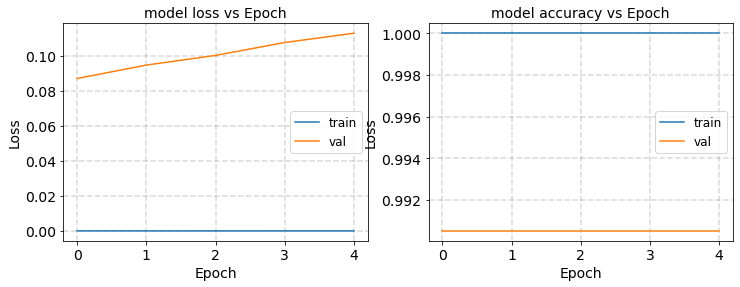

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1175 - accuracy: 0.9767 - val_loss: 0.0702 - val_accuracy: 0.9779
Epoch 2/5
1250/1250 - 3s - loss: 0.0176 - accuracy: 0.9946 - val_loss: 0.0866 - val_accuracy: 0.9778
Epoch 3/5
1250/1250 - 3s - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.1142 - val_accuracy: 0.9779
Epoch 4/5
1250/1250 - 3s - loss: 0.0059 - accuracy: 0.9978 - val_loss: 0.1069 - val_accuracy: 0.9787
Epoch 5/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.1404 - val_accuracy: 0.9764


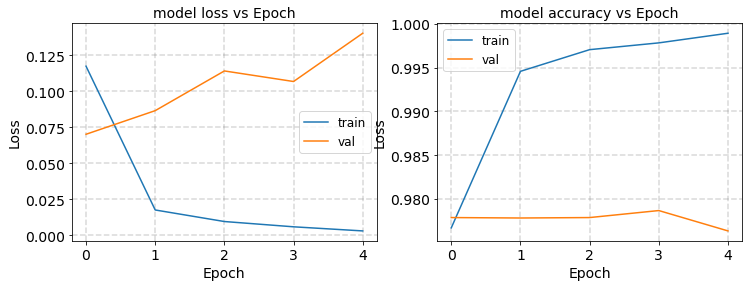

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0702 - accuracy: 0.9854 - val_loss: 0.0440 - val_accuracy: 0.9881
Epoch 2/5
1250/1250 - 4s - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0637 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0663 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 8.4921e-05 - accuracy: 1.0000 - val_loss: 0.0823 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 2.8237e-05 - accuracy: 1.0000 - val_loss: 0.0945 - val_accuracy: 0.9913


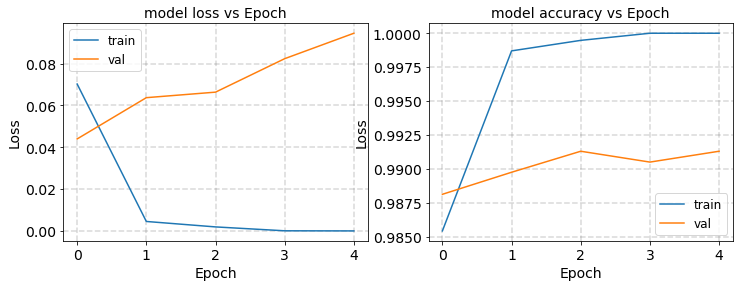

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1015 - accuracy: 0.9832 - val_loss: 0.0558 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.0672 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0976 - val_accuracy: 0.9810
Epoch 4/5
1250/1250 - 3s - loss: 6.2739e-05 - accuracy: 1.0000 - val_loss: 0.1075 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 3s - loss: 1.7054e-05 - accuracy: 1.0000 - val_loss: 0.1199 - val_accuracy: 0.9842


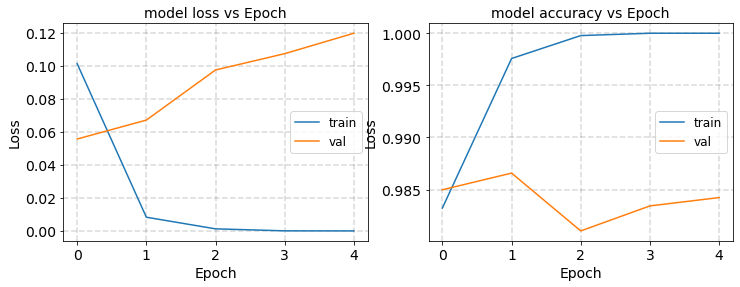

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
__________________________________________________

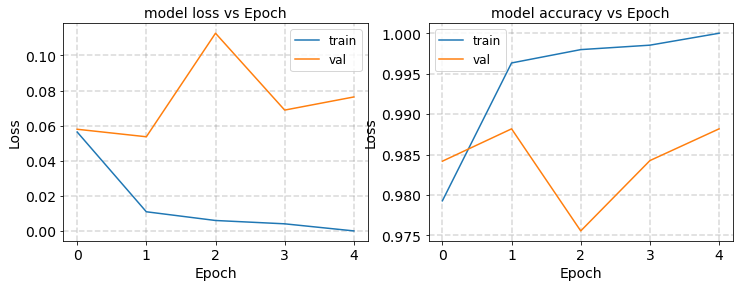

3
Epoch 1/5
1250/1250 - 2s - loss: 0.0876 - accuracy: 0.9783 - val_loss: 0.0600 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.0818 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 3s - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0817 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0836 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 3.7626e-05 - accuracy: 1.0000 - val_loss: 0.0994 - val_accuracy: 0.9858


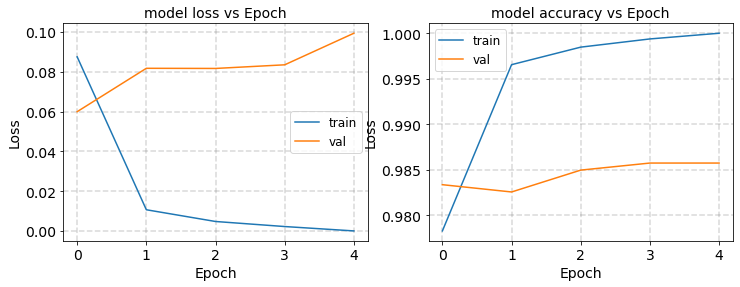

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0515 - accuracy: 0.9880 - val_loss: 0.0354 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 2s - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0544 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 1.0819e-04 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 1.4135e-05 - accuracy: 1.0000 - val_loss: 0.0690 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 5.2126e-06 - accuracy: 1.0000 - val_loss: 0.0767 - val_accuracy: 0.9913


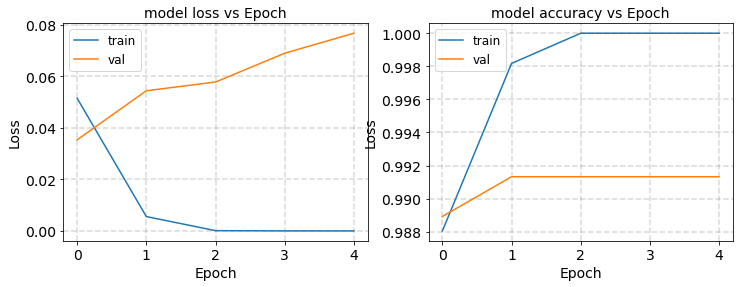

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1012 - accuracy: 0.9833 - val_loss: 0.0492 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.0617 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0744 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 5.5763e-05 - accuracy: 1.0000 - val_loss: 0.0923 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 1.3103e-05 - accuracy: 1.0000 - val_loss: 0.1045 - val_accuracy: 0.9913


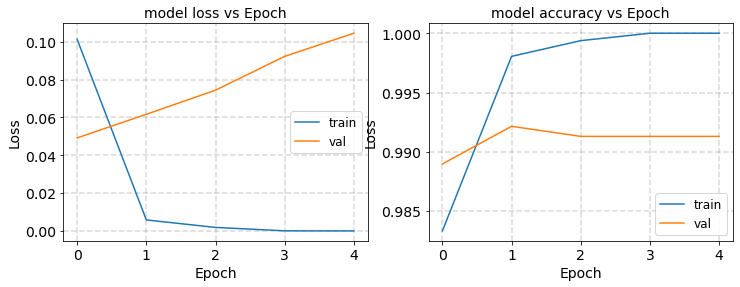

round1 [9 2 3 8]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.0809 - accuracy: 0.9847 - val_loss: 0.0478 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 3s - loss: 0.0043 - accuracy: 0.9984 - val_loss: 0.0534 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 3s - loss: 4.8484e-04 - accuracy: 0.9999 - val_loss: 0.0854 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 4.0309e-05 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 3s - loss: 7.6756e-06 - accuracy: 1.0000 - val_loss: 0.1018 - val_accuracy: 0.9897


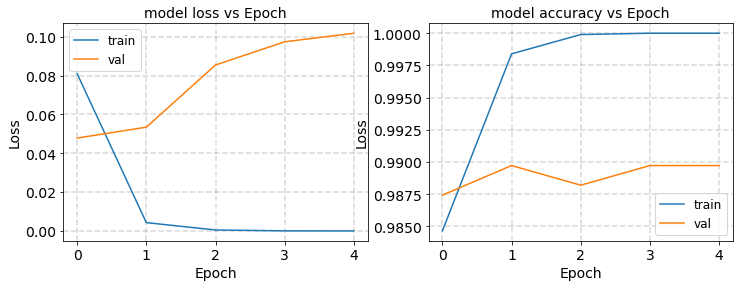

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1030 - accuracy: 0.9782 - val_loss: 0.0551 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.0559 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0725 - val_accuracy: 0.9881
Epoch 4/5
1250/1250 - 3s - loss: 2.1608e-04 - accuracy: 0.9999 - val_loss: 0.0859 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 2.6410e-05 - accuracy: 1.0000 - val_loss: 0.0971 - val_accuracy: 0.9913


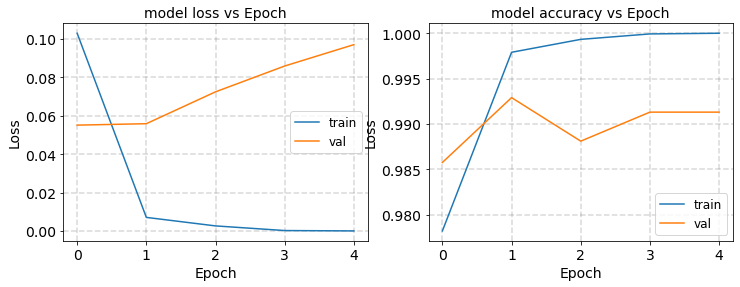

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1027 - accuracy: 0.9773 - val_loss: 0.0593 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0920 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 3s - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.1038 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1423 - val_accuracy: 0.9810
Epoch 5/5
1250/1250 - 3s - loss: 4.7763e-05 - accuracy: 1.0000 - val_loss: 0.1628 - val_accuracy: 0.9810


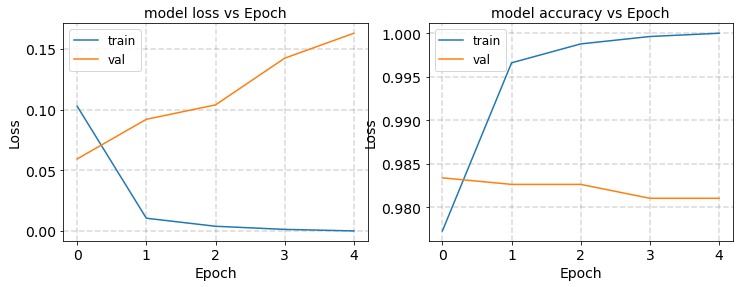

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0915 - accuracy: 0.9785 - val_loss: 0.0802 - val_accuracy: 0.9755
Epoch 2/5
1250/1250 - 3s - loss: 0.0108 - accuracy: 0.9962 - val_loss: 0.0804 - val_accuracy: 0.9787
Epoch 3/5
1250/1250 - 3s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.1204 - val_accuracy: 0.9810
Epoch 4/5
1250/1250 - 3s - loss: 1.4307e-04 - accuracy: 1.0000 - val_loss: 0.1410 - val_accuracy: 0.9819
Epoch 5/5
1250/1250 - 4s - loss: 2.1895e-05 - accuracy: 1.0000 - val_loss: 0.1556 - val_accuracy: 0.9811


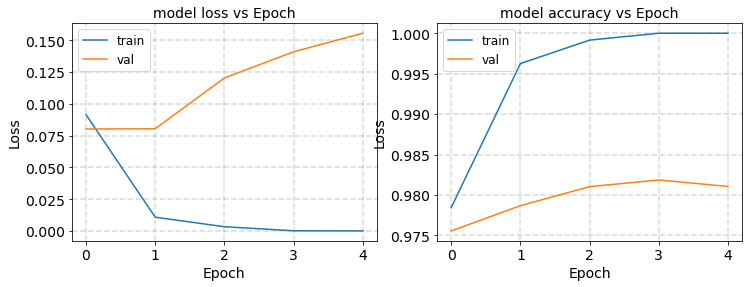

round2 [2 3 9 8]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.0815 - accuracy: 0.9902 - val_loss: 0.0573 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 4s - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0753 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 4s - loss: 1.7122e-04 - accuracy: 1.0000 - val_loss: 0.0848 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 4.3297e-05 - accuracy: 1.0000 - val_loss: 0.0926 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 1.6652e-05 - accuracy: 1.0000 - val_loss: 0.1058 - val_accuracy: 0.9905


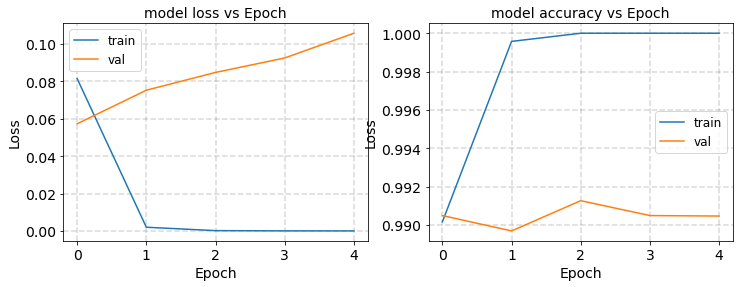

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0990 - accuracy: 0.9809 - val_loss: 0.0855 - val_accuracy: 0.9762
Epoch 2/5
1250/1250 - 4s - loss: 0.0106 - accuracy: 0.9975 - val_loss: 0.1091 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 4s - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.1460 - val_accuracy: 0.9794
Epoch 4/5
1250/1250 - 4s - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.1596 - val_accuracy: 0.9794
Epoch 5/5
1250/1250 - 4s - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.1169 - val_accuracy: 0.9826


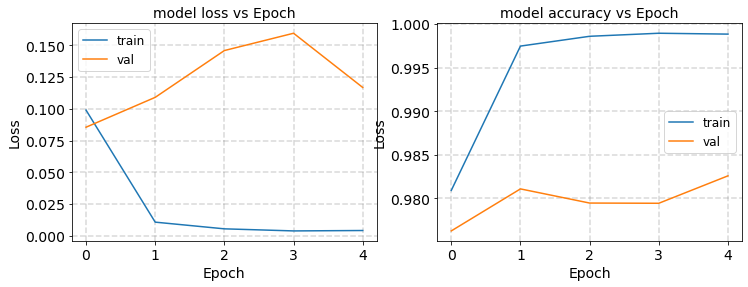

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0951 - accuracy: 0.9790 - val_loss: 0.0517 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0639 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 4s - loss: 0.0047 - accuracy: 0.9983 - val_loss: 0.0713 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 4s - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0684 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 3.2127e-04 - accuracy: 0.9999 - val_loss: 0.0892 - val_accuracy: 0.9906


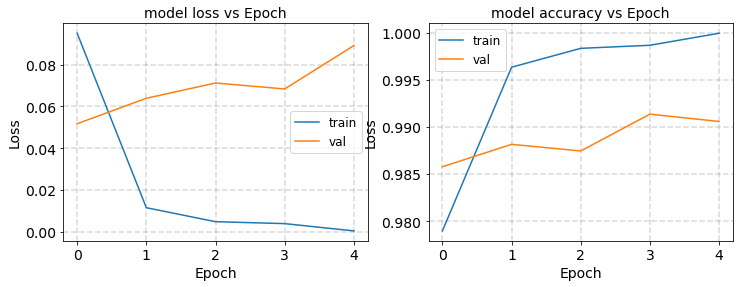

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0939 - accuracy: 0.9783 - val_loss: 0.0957 - val_accuracy: 0.9732
Epoch 2/5
1250/1250 - 4s - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.0928 - val_accuracy: 0.9795
Epoch 3/5
1250/1250 - 4s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.1329 - val_accuracy: 0.9803
Epoch 4/5
1250/1250 - 3s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.1227 - val_accuracy: 0.9819
Epoch 5/5
1250/1250 - 4s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.1292 - val_accuracy: 0.9803


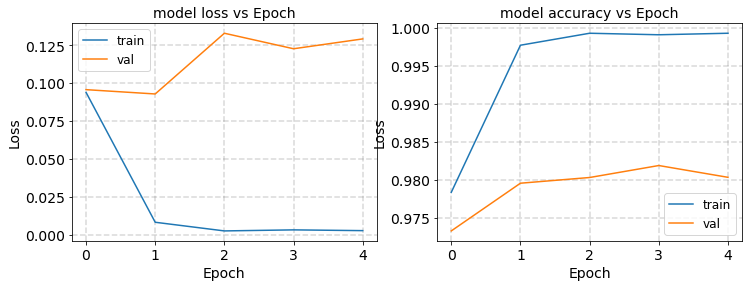

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
__________________________________________________

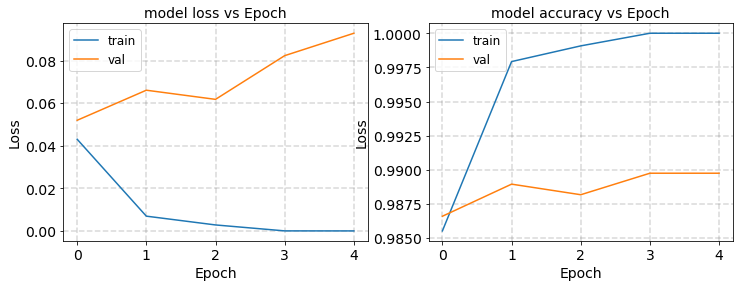

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0775 - accuracy: 0.9813 - val_loss: 0.0384 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 2s - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.0303 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0419 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 2s - loss: 1.3934e-04 - accuracy: 0.9999 - val_loss: 0.0500 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 2s - loss: 9.8388e-06 - accuracy: 1.0000 - val_loss: 0.0579 - val_accuracy: 0.9945


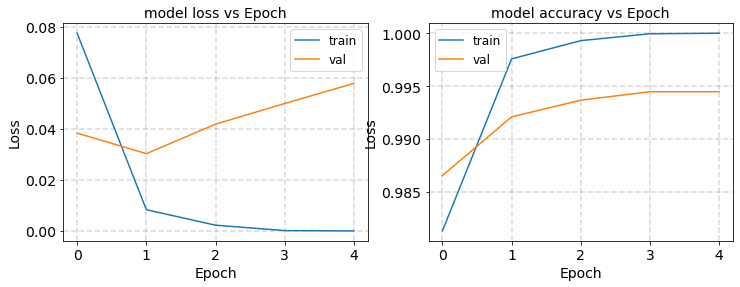

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1185 - accuracy: 0.9744 - val_loss: 0.0560 - val_accuracy: 0.9841
Epoch 2/5
1250/1250 - 2s - loss: 0.0172 - accuracy: 0.9951 - val_loss: 0.0958 - val_accuracy: 0.9746
Epoch 3/5
1250/1250 - 2s - loss: 0.0067 - accuracy: 0.9982 - val_loss: 0.0686 - val_accuracy: 0.9849
Epoch 4/5
1250/1250 - 2s - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.0752 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 2s - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.1153 - val_accuracy: 0.9834


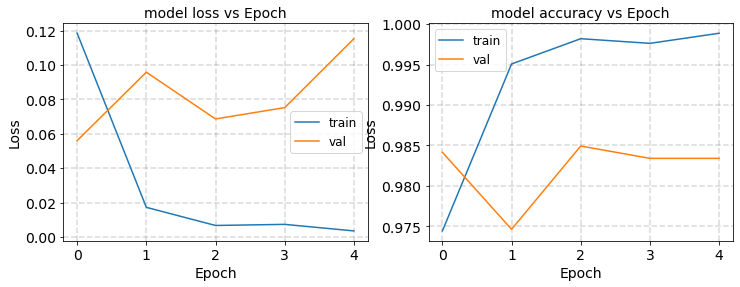

8
Epoch 1/5
1250/1250 - 2s - loss: 0.1091 - accuracy: 0.9681 - val_loss: 0.0718 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 3s - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0839 - val_accuracy: 0.9779
Epoch 3/5
1250/1250 - 2s - loss: 0.0076 - accuracy: 0.9971 - val_loss: 0.0872 - val_accuracy: 0.9833
Epoch 4/5
1250/1250 - 3s - loss: 5.1302e-04 - accuracy: 0.9999 - val_loss: 0.1196 - val_accuracy: 0.9841
Epoch 5/5
1250/1250 - 3s - loss: 3.3608e-05 - accuracy: 1.0000 - val_loss: 0.1362 - val_accuracy: 0.9834


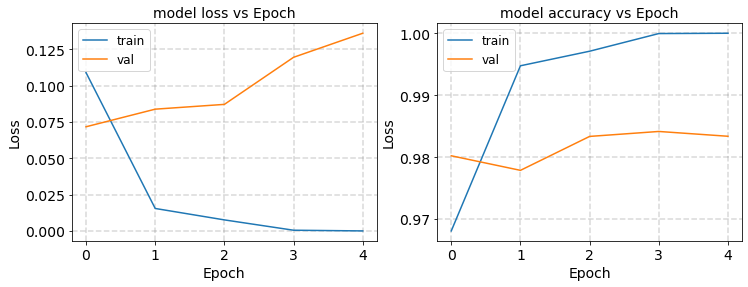

round1 [2 3 8 9]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.0875 - accuracy: 0.9832 - val_loss: 0.0576 - val_accuracy: 0.9857
Epoch 2/5
1250/1250 - 3s - loss: 0.0073 - accuracy: 0.9972 - val_loss: 0.0864 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9990 - val_loss: 0.1193 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 2s - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0892 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.1061 - val_accuracy: 0.9889


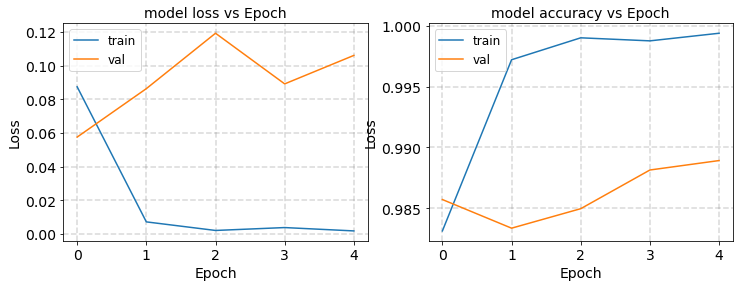

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1385 - accuracy: 0.9568 - val_loss: 0.0635 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 2s - loss: 0.0123 - accuracy: 0.9964 - val_loss: 0.0880 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 2s - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.1138 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 2s - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0762 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 2s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0902 - val_accuracy: 0.9913


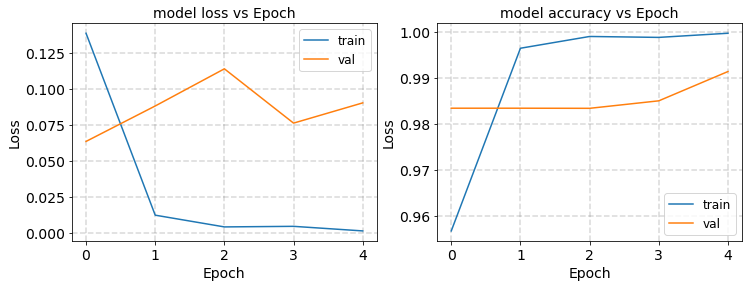

8
Epoch 1/5
1250/1250 - 2s - loss: 0.1080 - accuracy: 0.9740 - val_loss: 0.0769 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 2s - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.1147 - val_accuracy: 0.9707
Epoch 3/5
1250/1250 - 2s - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.1099 - val_accuracy: 0.9825
Epoch 4/5
1250/1250 - 2s - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.1406 - val_accuracy: 0.9810
Epoch 5/5
1250/1250 - 2s - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.1378 - val_accuracy: 0.9794


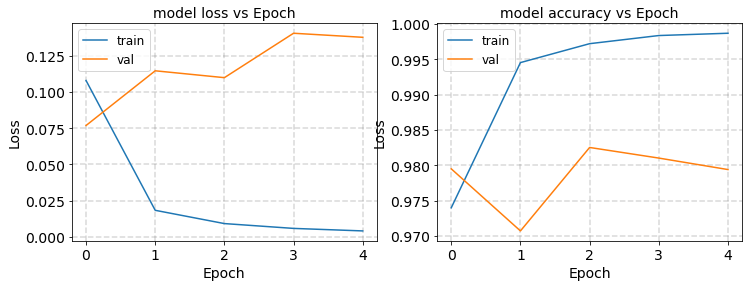

9
Epoch 1/5
1250/1250 - 2s - loss: 0.0879 - accuracy: 0.9800 - val_loss: 0.0501 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 2s - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0611 - val_accuracy: 0.9851
Epoch 3/5
1250/1250 - 2s - loss: 7.8461e-04 - accuracy: 0.9999 - val_loss: 0.0728 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 2s - loss: 1.2232e-04 - accuracy: 1.0000 - val_loss: 0.0856 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 2.4300e-05 - accuracy: 1.0000 - val_loss: 0.1044 - val_accuracy: 0.9866


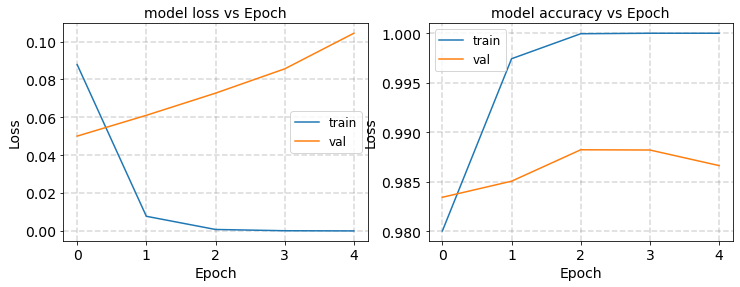

round2 [3 8 9 2]
3
Epoch 1/5
1250/1250 - 2s - loss: 0.1286 - accuracy: 0.9759 - val_loss: 0.0798 - val_accuracy: 0.9779
Epoch 2/5
1250/1250 - 2s - loss: 0.0130 - accuracy: 0.9962 - val_loss: 0.1157 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 2s - loss: 0.0070 - accuracy: 0.9976 - val_loss: 0.1088 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 2s - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.1308 - val_accuracy: 0.9810
Epoch 5/5
1250/1250 - 2s - loss: 7.6314e-05 - accuracy: 1.0000 - val_loss: 0.1441 - val_accuracy: 0.9794


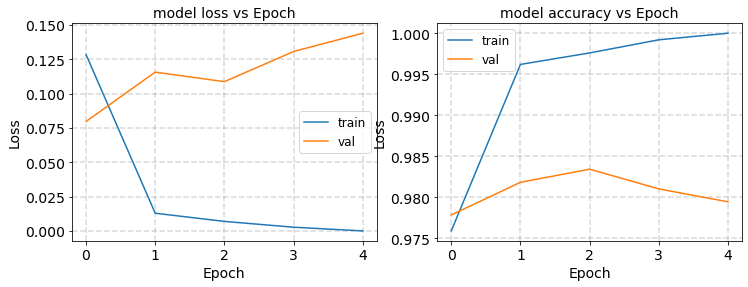

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0865 - accuracy: 0.9829 - val_loss: 0.0987 - val_accuracy: 0.9747
Epoch 2/5
1250/1250 - 3s - loss: 0.0126 - accuracy: 0.9961 - val_loss: 0.1040 - val_accuracy: 0.9763
Epoch 3/5
1250/1250 - 3s - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.1308 - val_accuracy: 0.9762
Epoch 4/5
1250/1250 - 3s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.1596 - val_accuracy: 0.9764
Epoch 5/5
1250/1250 - 3s - loss: 9.3433e-05 - accuracy: 1.0000 - val_loss: 0.1857 - val_accuracy: 0.9779


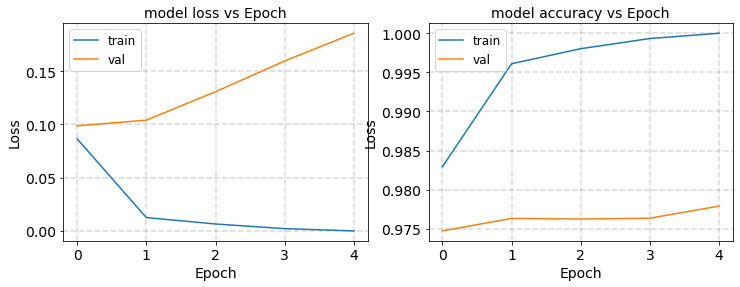

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0649 - accuracy: 0.9868 - val_loss: 0.0539 - val_accuracy: 0.9827
Epoch 2/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0683 - val_accuracy: 0.9859
Epoch 3/5
1250/1250 - 3s - loss: 3.7632e-04 - accuracy: 1.0000 - val_loss: 0.0753 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 1.8512e-05 - accuracy: 1.0000 - val_loss: 0.0841 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 7.0623e-06 - accuracy: 1.0000 - val_loss: 0.0954 - val_accuracy: 0.9890


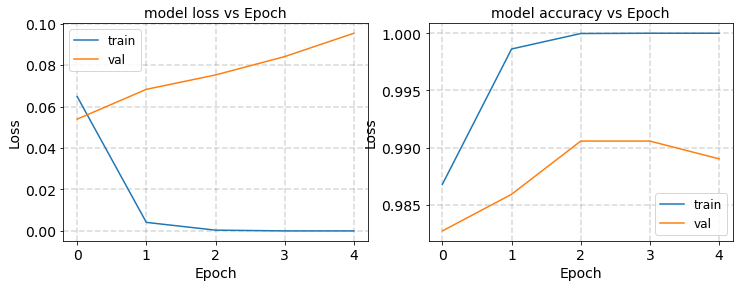

2
Epoch 1/5
1250/1250 - 3s - loss: 0.2097 - accuracy: 0.9650 - val_loss: 0.0570 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 2s - loss: 0.0166 - accuracy: 0.9942 - val_loss: 0.0569 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 3s - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.0607 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0711 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 3s - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0819 - val_accuracy: 0.9905


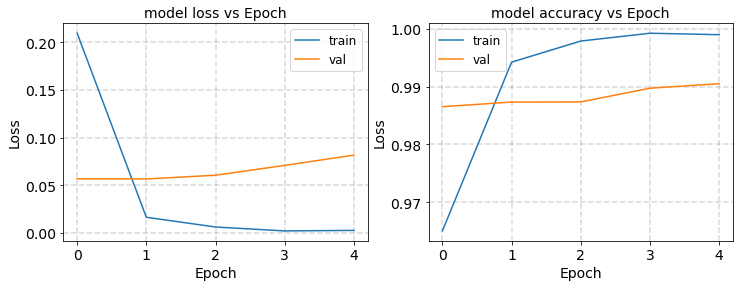

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
__________________________________________________

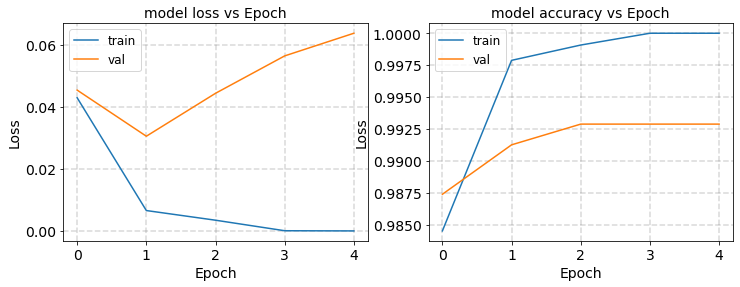

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0708 - accuracy: 0.9819 - val_loss: 0.0537 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 2s - loss: 0.0072 - accuracy: 0.9975 - val_loss: 0.0587 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 3s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0689 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 3s - loss: 7.6684e-05 - accuracy: 1.0000 - val_loss: 0.0864 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 3s - loss: 1.4925e-05 - accuracy: 1.0000 - val_loss: 0.0983 - val_accuracy: 0.9874


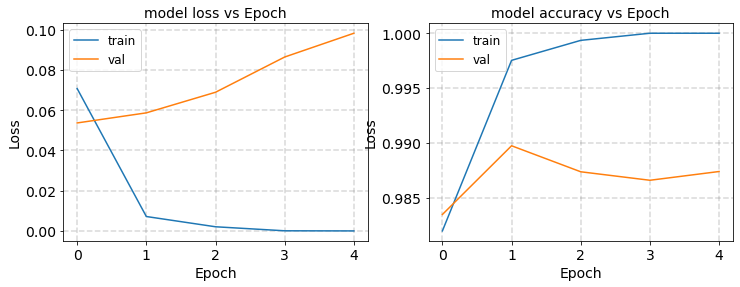

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1149 - accuracy: 0.9740 - val_loss: 0.0955 - val_accuracy: 0.9708
Epoch 2/5
1250/1250 - 2s - loss: 0.0164 - accuracy: 0.9952 - val_loss: 0.1125 - val_accuracy: 0.9787
Epoch 3/5
1250/1250 - 3s - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.1064 - val_accuracy: 0.9811
Epoch 4/5
1250/1250 - 2s - loss: 7.0778e-04 - accuracy: 0.9998 - val_loss: 0.1617 - val_accuracy: 0.9795
Epoch 5/5
1250/1250 - 3s - loss: 3.2282e-05 - accuracy: 1.0000 - val_loss: 0.1854 - val_accuracy: 0.9803


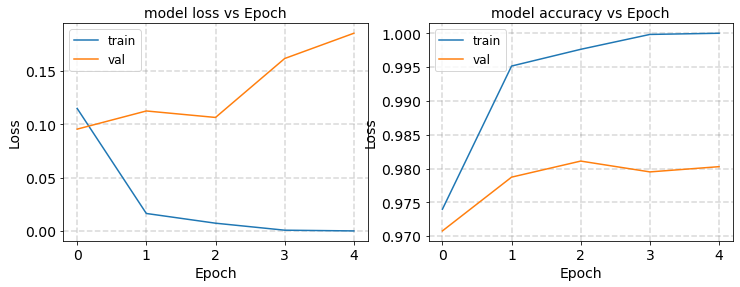

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0934 - accuracy: 0.9758 - val_loss: 0.0665 - val_accuracy: 0.9801
Epoch 2/5
1250/1250 - 4s - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.0574 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 3s - loss: 0.0103 - accuracy: 0.9966 - val_loss: 0.0520 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 0.0052 - accuracy: 0.9982 - val_loss: 0.0971 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.0662 - val_accuracy: 0.9865


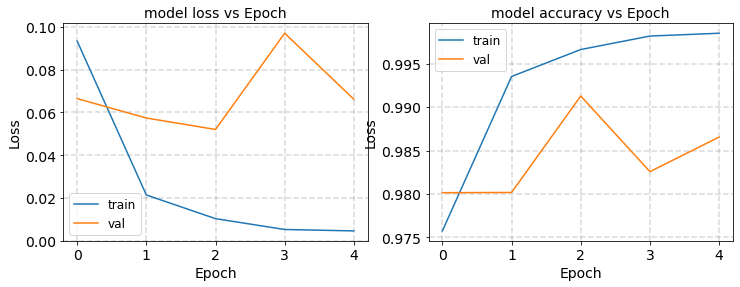

round1 [8 3 9 2]
8
Epoch 1/5
1250/1250 - 3s - loss: 1.7842e-04 - accuracy: 1.0000 - val_loss: 0.0882 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 3s - loss: 1.6064e-05 - accuracy: 1.0000 - val_loss: 0.0988 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 3s - loss: 6.0792e-06 - accuracy: 1.0000 - val_loss: 0.1112 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 3s - loss: 2.5122e-06 - accuracy: 1.0000 - val_loss: 0.1185 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 3s - loss: 1.0815e-06 - accuracy: 1.0000 - val_loss: 0.1277 - val_accuracy: 0.9873


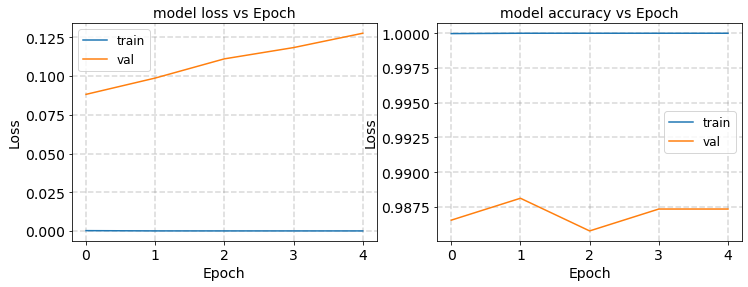

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1172 - accuracy: 0.9773 - val_loss: 0.0773 - val_accuracy: 0.9715
Epoch 2/5
1250/1250 - 3s - loss: 0.0124 - accuracy: 0.9957 - val_loss: 0.1177 - val_accuracy: 0.9755
Epoch 3/5
1250/1250 - 3s - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.1326 - val_accuracy: 0.9803
Epoch 4/5
1250/1250 - 3s - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.1075 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 3s - loss: 9.2565e-05 - accuracy: 1.0000 - val_loss: 0.1504 - val_accuracy: 0.9819


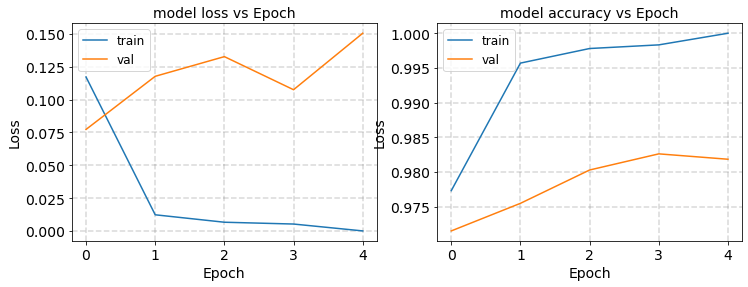

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0788 - accuracy: 0.9868 - val_loss: 0.0435 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0652 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0714 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 6.0121e-05 - accuracy: 1.0000 - val_loss: 0.0902 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 1.8456e-05 - accuracy: 1.0000 - val_loss: 0.1056 - val_accuracy: 0.9905


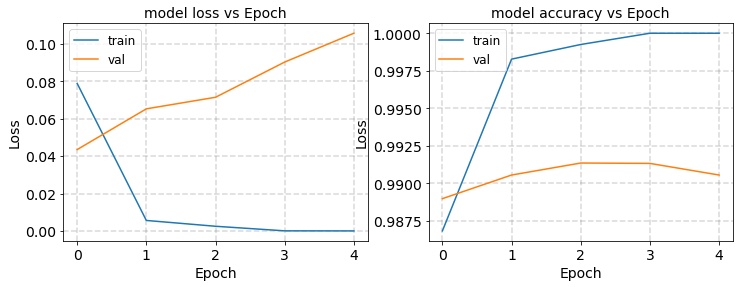

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1084 - accuracy: 0.9822 - val_loss: 0.0593 - val_accuracy: 0.9859
Epoch 2/5
1250/1250 - 3s - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.0762 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 4s - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0851 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0868 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 1.2012e-04 - accuracy: 1.0000 - val_loss: 0.1033 - val_accuracy: 0.9898


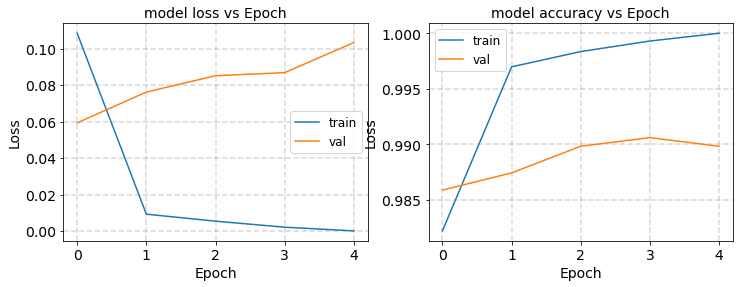

round2 [9 3 2 8]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.0903 - accuracy: 0.9832 - val_loss: 0.0863 - val_accuracy: 0.9786
Epoch 2/5
1250/1250 - 3s - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.1063 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1579 - val_accuracy: 0.9810
Epoch 4/5
1250/1250 - 3s - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.1161 - val_accuracy: 0.9803
Epoch 5/5
1250/1250 - 3s - loss: 5.6232e-04 - accuracy: 0.9999 - val_loss: 0.1554 - val_accuracy: 0.9826


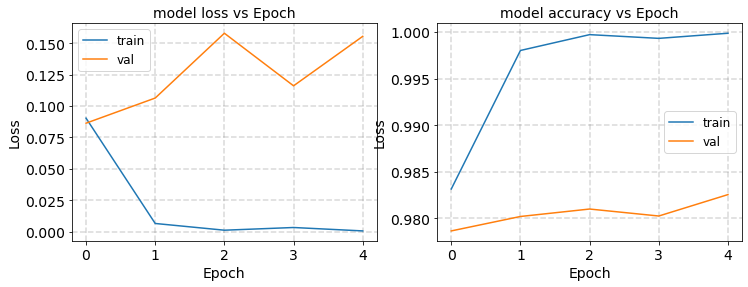

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1433 - accuracy: 0.9612 - val_loss: 0.0977 - val_accuracy: 0.9709
Epoch 2/5
1250/1250 - 4s - loss: 0.0269 - accuracy: 0.9907 - val_loss: 0.0939 - val_accuracy: 0.9755
Epoch 3/5
1250/1250 - 4s - loss: 0.0114 - accuracy: 0.9959 - val_loss: 0.1290 - val_accuracy: 0.9724
Epoch 4/5
1250/1250 - 4s - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.1462 - val_accuracy: 0.9740
Epoch 5/5
1250/1250 - 4s - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.1638 - val_accuracy: 0.9740


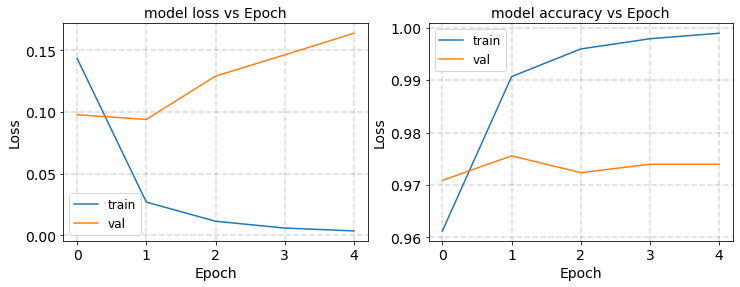

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1260 - accuracy: 0.9730 - val_loss: 0.0746 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 0.0190 - accuracy: 0.9945 - val_loss: 0.0825 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 4s - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.0907 - val_accuracy: 0.9865
Epoch 4/5
1250/1250 - 4s - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.1030 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.1077 - val_accuracy: 0.9874


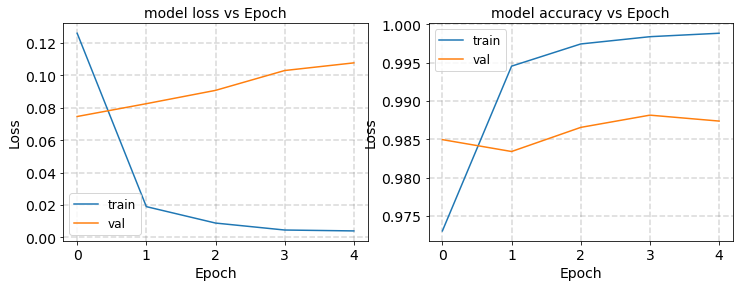

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1670 - accuracy: 0.9444 - val_loss: 0.0638 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 4s - loss: 0.0298 - accuracy: 0.9919 - val_loss: 0.0752 - val_accuracy: 0.9755
Epoch 3/5
1250/1250 - 4s - loss: 0.0147 - accuracy: 0.9959 - val_loss: 0.0989 - val_accuracy: 0.9755
Epoch 4/5
1250/1250 - 4s - loss: 0.0107 - accuracy: 0.9970 - val_loss: 0.1138 - val_accuracy: 0.9763
Epoch 5/5
1250/1250 - 3s - loss: 0.0062 - accuracy: 0.9984 - val_loss: 0.1151 - val_accuracy: 0.9811


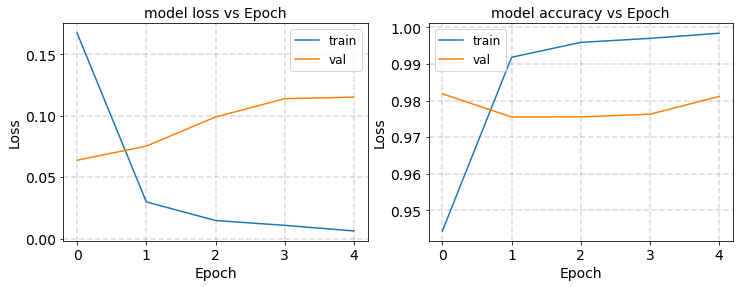

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
_________________________________________________

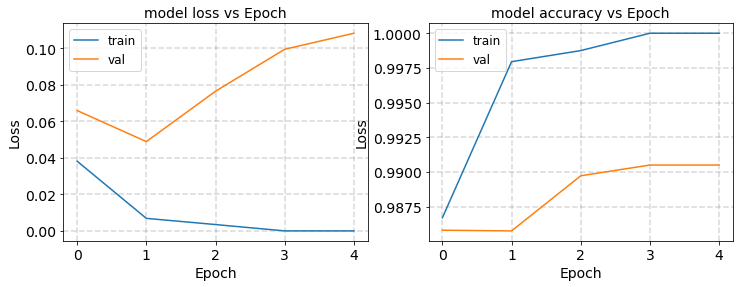

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1072 - accuracy: 0.9788 - val_loss: 0.0349 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 2s - loss: 0.0121 - accuracy: 0.9963 - val_loss: 0.0438 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.0509 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 2s - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0396 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 2s - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0515 - val_accuracy: 0.9922


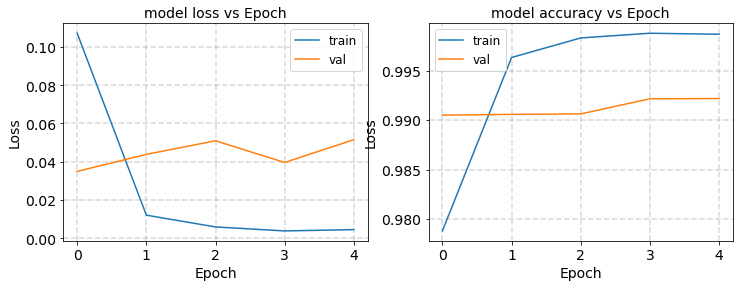

8
Epoch 1/5
1250/1250 - 2s - loss: 0.1294 - accuracy: 0.9610 - val_loss: 0.0575 - val_accuracy: 0.9787
Epoch 2/5
1250/1250 - 2s - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0575 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 2s - loss: 0.0152 - accuracy: 0.9957 - val_loss: 0.0745 - val_accuracy: 0.9779
Epoch 4/5
1250/1250 - 2s - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.0830 - val_accuracy: 0.9787
Epoch 5/5
1250/1250 - 2s - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.1162 - val_accuracy: 0.9826


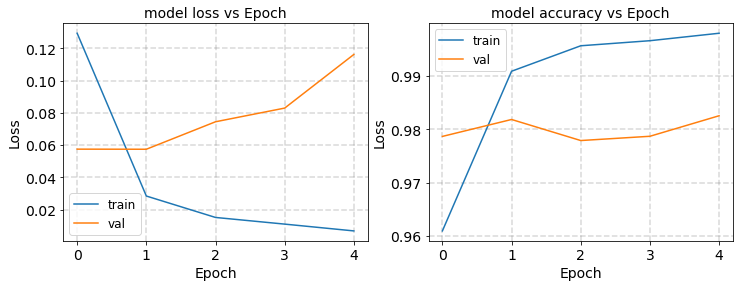

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1346 - accuracy: 0.9607 - val_loss: 0.0920 - val_accuracy: 0.9731
Epoch 2/5
1250/1250 - 2s - loss: 0.0312 - accuracy: 0.9895 - val_loss: 0.1017 - val_accuracy: 0.9748
Epoch 3/5
1250/1250 - 2s - loss: 0.0166 - accuracy: 0.9948 - val_loss: 0.1226 - val_accuracy: 0.9771
Epoch 4/5
1250/1250 - 2s - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.1271 - val_accuracy: 0.9779
Epoch 5/5
1250/1250 - 2s - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.1574 - val_accuracy: 0.9747


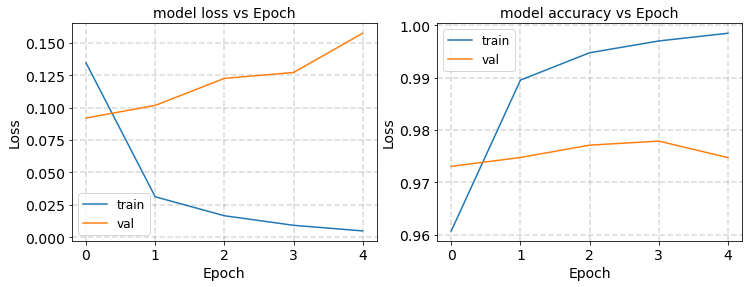

round1 [9 2 8 3]
9
Epoch 1/5
1250/1250 - 2s - loss: 0.0856 - accuracy: 0.9795 - val_loss: 0.0461 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 2s - loss: 0.0237 - accuracy: 0.9922 - val_loss: 0.0527 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 2s - loss: 0.0109 - accuracy: 0.9962 - val_loss: 0.0497 - val_accuracy: 0.9865
Epoch 4/5
1250/1250 - 2s - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0702 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 2s - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.0592 - val_accuracy: 0.9842


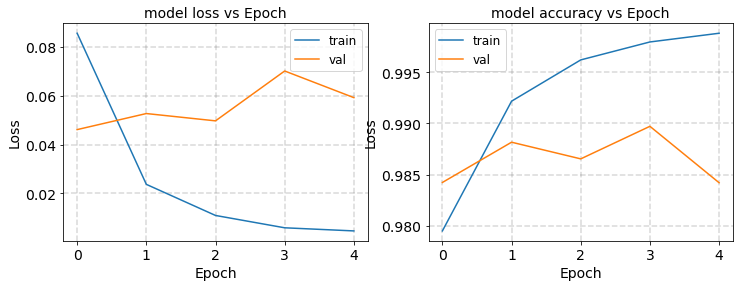

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1217 - accuracy: 0.9679 - val_loss: 0.0606 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 2s - loss: 0.0182 - accuracy: 0.9940 - val_loss: 0.0438 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 2s - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0747 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 2s - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.0487 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0718 - val_accuracy: 0.9882


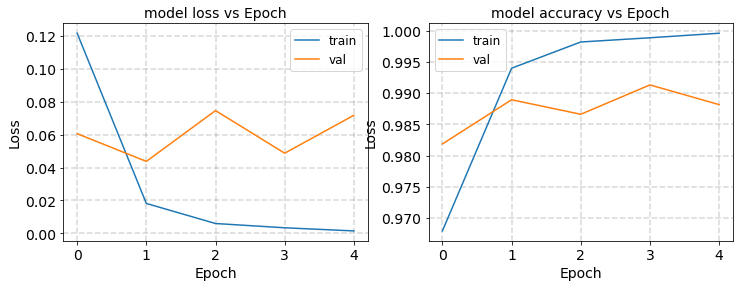

8
Epoch 1/5
1250/1250 - 2s - loss: 0.1066 - accuracy: 0.9729 - val_loss: 0.1050 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 2s - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.1384 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 2s - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.1574 - val_accuracy: 0.9819
Epoch 4/5
1250/1250 - 2s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.1733 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 2s - loss: 6.4389e-05 - accuracy: 1.0000 - val_loss: 0.2063 - val_accuracy: 0.9866


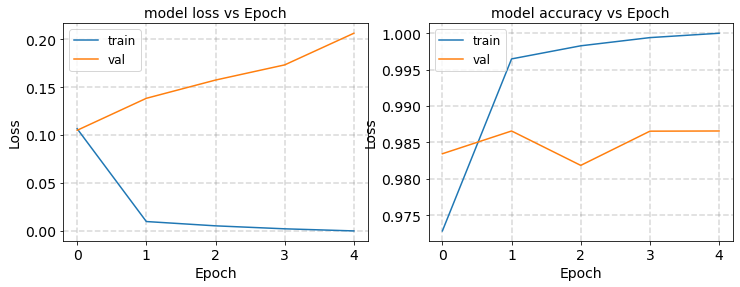

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1577 - accuracy: 0.9654 - val_loss: 0.1156 - val_accuracy: 0.9691
Epoch 2/5
1250/1250 - 2s - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.1341 - val_accuracy: 0.9754
Epoch 3/5
1250/1250 - 2s - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.1639 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 2s - loss: 0.0044 - accuracy: 0.9984 - val_loss: 0.1869 - val_accuracy: 0.9802
Epoch 5/5
1250/1250 - 2s - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.1900 - val_accuracy: 0.9810


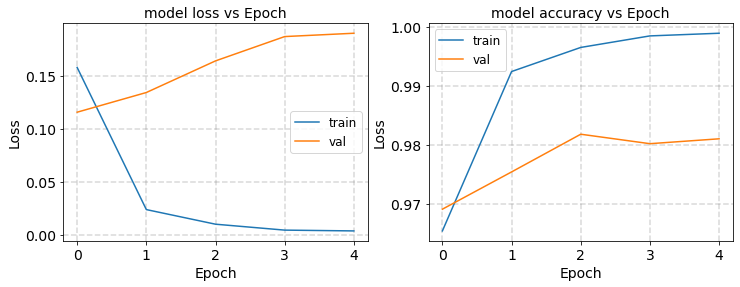

round2 [3 9 8 2]
3
Epoch 1/5
1250/1250 - 2s - loss: 1.7892e-04 - accuracy: 1.0000 - val_loss: 0.2246 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 2s - loss: 3.5084e-05 - accuracy: 1.0000 - val_loss: 0.2523 - val_accuracy: 0.9794
Epoch 3/5
1250/1250 - 2s - loss: 1.3597e-05 - accuracy: 1.0000 - val_loss: 0.2776 - val_accuracy: 0.9802
Epoch 4/5
1250/1250 - 2s - loss: 5.5654e-06 - accuracy: 1.0000 - val_loss: 0.2999 - val_accuracy: 0.9794
Epoch 5/5
1250/1250 - 2s - loss: 2.0553e-06 - accuracy: 1.0000 - val_loss: 0.3289 - val_accuracy: 0.9794


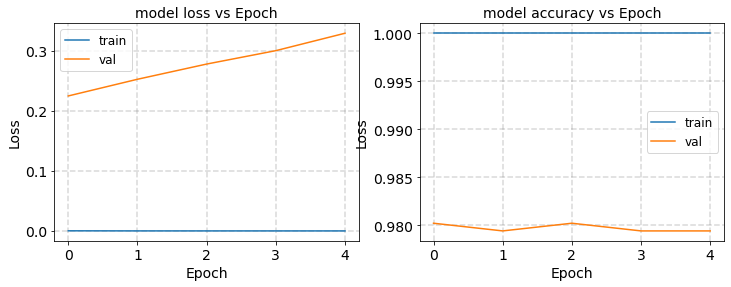

9
Epoch 1/5
1250/1250 - 3s - loss: 0.1055 - accuracy: 0.9857 - val_loss: 0.0641 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 3s - loss: 0.0109 - accuracy: 0.9961 - val_loss: 0.0780 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.1435 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0595 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 9.8780e-04 - accuracy: 0.9998 - val_loss: 0.1156 - val_accuracy: 0.9898


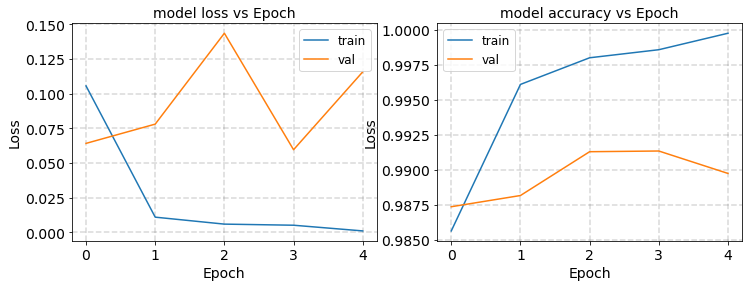

8
Epoch 1/5
1250/1250 - 2s - loss: 0.1134 - accuracy: 0.9739 - val_loss: 0.0817 - val_accuracy: 0.9786
Epoch 2/5
1250/1250 - 3s - loss: 0.0130 - accuracy: 0.9955 - val_loss: 0.1137 - val_accuracy: 0.9803
Epoch 3/5
1250/1250 - 3s - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.1182 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.1130 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 3s - loss: 3.2149e-04 - accuracy: 0.9999 - val_loss: 0.1546 - val_accuracy: 0.9850


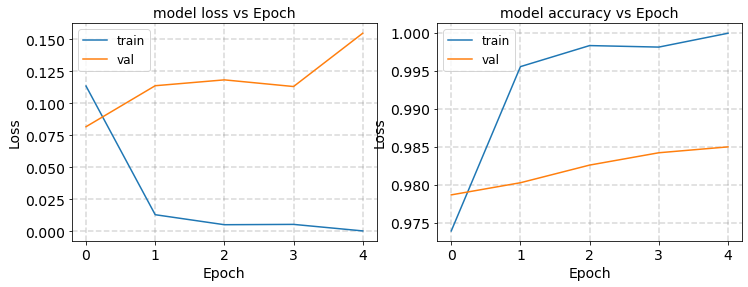

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1235 - accuracy: 0.9789 - val_loss: 0.0423 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 3s - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.0590 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0666 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 4s - loss: 3.7471e-04 - accuracy: 0.9999 - val_loss: 0.0774 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 3s - loss: 5.4171e-05 - accuracy: 1.0000 - val_loss: 0.0899 - val_accuracy: 0.9897


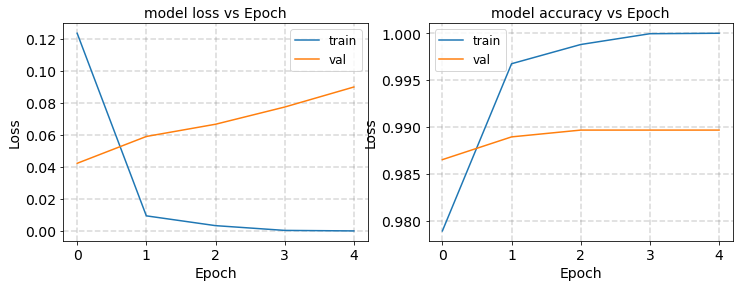

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_39 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
_________________________________________________

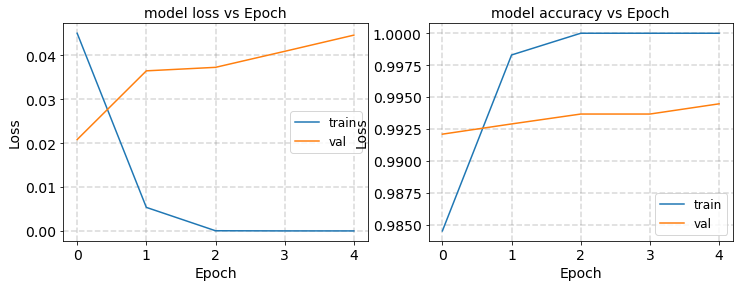

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0654 - accuracy: 0.9855 - val_loss: 0.0696 - val_accuracy: 0.9771
Epoch 2/5
1250/1250 - 4s - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0764 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.1052 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1382 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 2.6384e-05 - accuracy: 1.0000 - val_loss: 0.1616 - val_accuracy: 0.9866


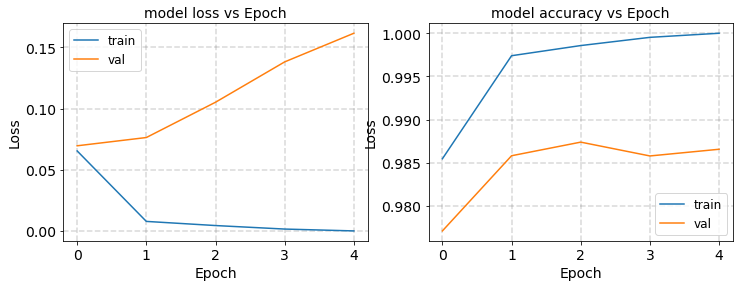

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1069 - accuracy: 0.9755 - val_loss: 0.0665 - val_accuracy: 0.9772
Epoch 2/5
1250/1250 - 3s - loss: 0.0180 - accuracy: 0.9945 - val_loss: 0.0857 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 4s - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.0943 - val_accuracy: 0.9794
Epoch 4/5
1250/1250 - 4s - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.1257 - val_accuracy: 0.9810
Epoch 5/5
1250/1250 - 3s - loss: 9.7972e-05 - accuracy: 1.0000 - val_loss: 0.1582 - val_accuracy: 0.9818


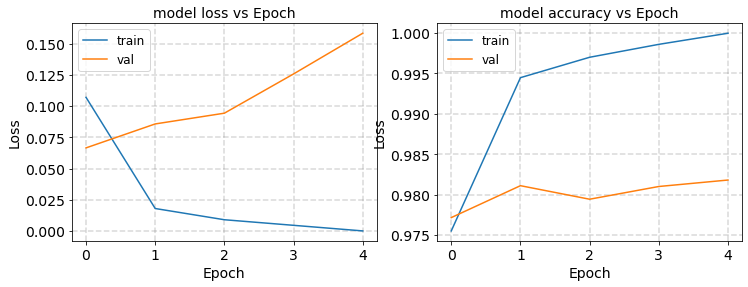

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1137 - accuracy: 0.9700 - val_loss: 0.0521 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 4s - loss: 0.0154 - accuracy: 0.9945 - val_loss: 0.0697 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 4s - loss: 0.0070 - accuracy: 0.9976 - val_loss: 0.0944 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 3s - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0879 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 9.8947e-05 - accuracy: 1.0000 - val_loss: 0.0956 - val_accuracy: 0.9873


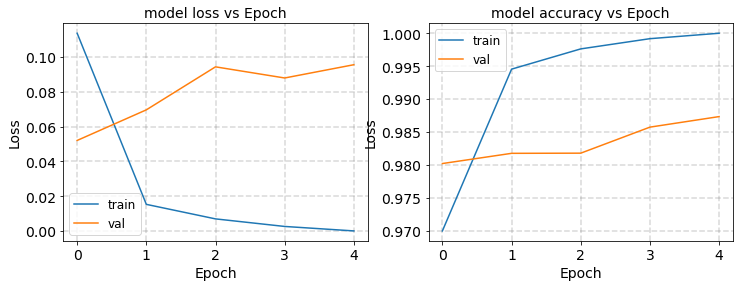

round1 [3 2 8 9]
3
Epoch 1/5
1250/1250 - 3s - loss: 0.0906 - accuracy: 0.9780 - val_loss: 0.0705 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 3s - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.1086 - val_accuracy: 0.9794
Epoch 3/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.1114 - val_accuracy: 0.9803
Epoch 4/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.1335 - val_accuracy: 0.9794
Epoch 5/5
1250/1250 - 3s - loss: 4.6506e-05 - accuracy: 1.0000 - val_loss: 0.1542 - val_accuracy: 0.9794


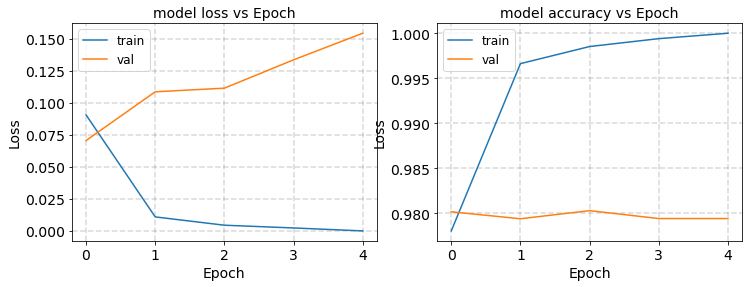

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1112 - accuracy: 0.9797 - val_loss: 0.0670 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0078 - accuracy: 0.9979 - val_loss: 0.0590 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0809 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0884 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 5.1509e-05 - accuracy: 1.0000 - val_loss: 0.0961 - val_accuracy: 0.9913


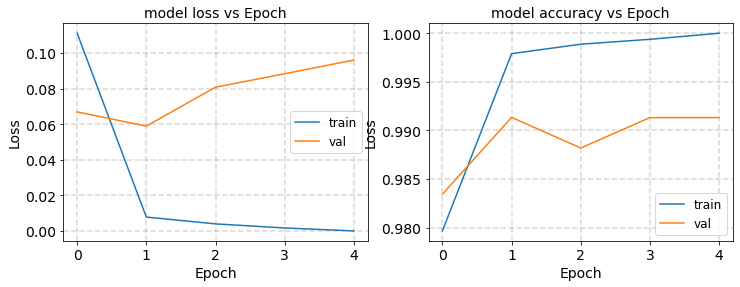

8
Epoch 1/5
1250/1250 - 2s - loss: 0.0869 - accuracy: 0.9806 - val_loss: 0.0685 - val_accuracy: 0.9779
Epoch 2/5
1250/1250 - 3s - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0936 - val_accuracy: 0.9771
Epoch 3/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0902 - val_accuracy: 0.9810
Epoch 4/5
1250/1250 - 3s - loss: 2.8465e-04 - accuracy: 0.9999 - val_loss: 0.1039 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 3s - loss: 4.0863e-05 - accuracy: 1.0000 - val_loss: 0.1168 - val_accuracy: 0.9842


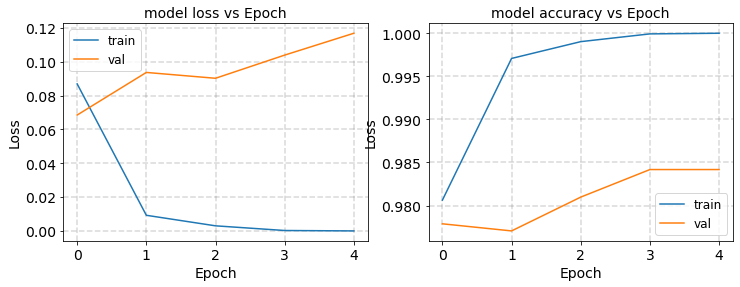

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0718 - accuracy: 0.9887 - val_loss: 0.0739 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 3s - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0658 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0533 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0681 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 1.1899e-04 - accuracy: 1.0000 - val_loss: 0.0845 - val_accuracy: 0.9905


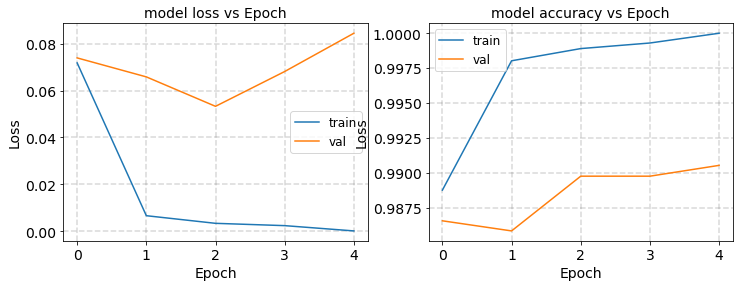

round2 [9 3 2 8]
9
Epoch 1/5
1250/1250 - 3s - loss: 2.0458e-05 - accuracy: 1.0000 - val_loss: 0.0928 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 8.2234e-06 - accuracy: 1.0000 - val_loss: 0.1006 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 3s - loss: 3.5819e-06 - accuracy: 1.0000 - val_loss: 0.1080 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 1.6986e-06 - accuracy: 1.0000 - val_loss: 0.1150 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 8.0241e-07 - accuracy: 1.0000 - val_loss: 0.1218 - val_accuracy: 0.9905


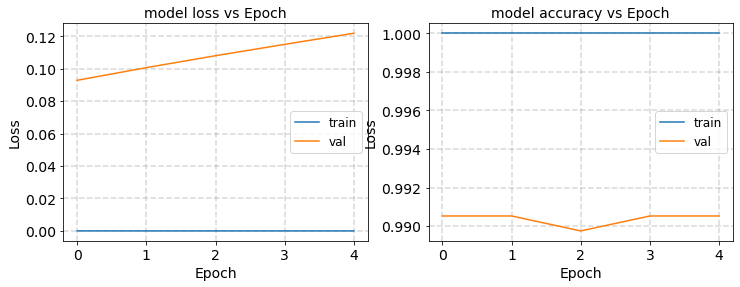

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1642 - accuracy: 0.9664 - val_loss: 0.0753 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 3s - loss: 0.0255 - accuracy: 0.9916 - val_loss: 0.1105 - val_accuracy: 0.9739
Epoch 3/5
1250/1250 - 3s - loss: 0.0121 - accuracy: 0.9963 - val_loss: 0.1223 - val_accuracy: 0.9755
Epoch 4/5
1250/1250 - 3s - loss: 0.0069 - accuracy: 0.9981 - val_loss: 0.1302 - val_accuracy: 0.9771
Epoch 5/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.1479 - val_accuracy: 0.9778


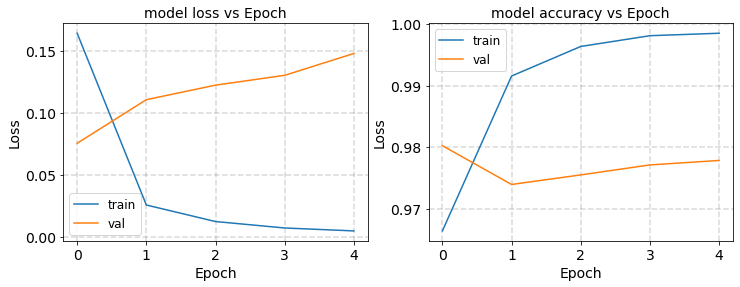

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1492 - accuracy: 0.9665 - val_loss: 0.0662 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 2s - loss: 0.0264 - accuracy: 0.9912 - val_loss: 0.0539 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 2s - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0515 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 3s - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0720 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0719 - val_accuracy: 0.9866


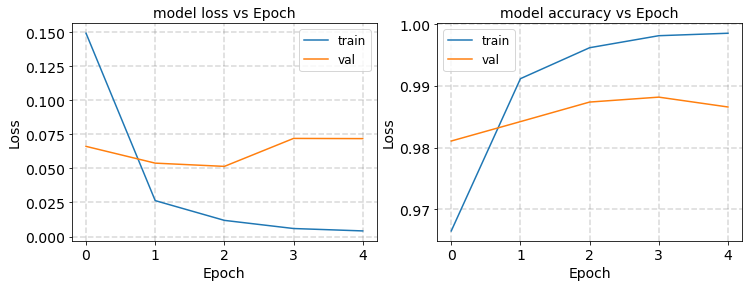

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1461 - accuracy: 0.9554 - val_loss: 0.0677 - val_accuracy: 0.9740
Epoch 2/5
1250/1250 - 2s - loss: 0.0279 - accuracy: 0.9902 - val_loss: 0.0679 - val_accuracy: 0.9755
Epoch 3/5
1250/1250 - 2s - loss: 0.0144 - accuracy: 0.9948 - val_loss: 0.0708 - val_accuracy: 0.9772
Epoch 4/5
1250/1250 - 2s - loss: 0.0074 - accuracy: 0.9979 - val_loss: 0.0964 - val_accuracy: 0.9803
Epoch 5/5
1250/1250 - 2s - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.0985 - val_accuracy: 0.9787


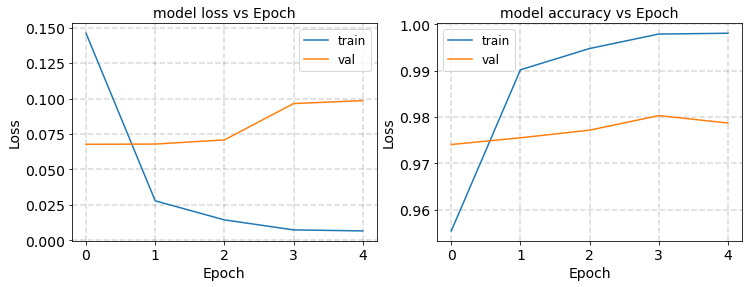

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_43 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_44 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_45 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
_________________________________________________

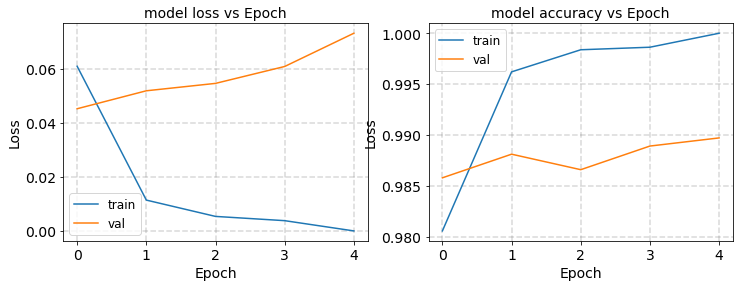

9
Epoch 1/5
1250/1250 - 2s - loss: 0.0613 - accuracy: 0.9863 - val_loss: 0.0566 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 2s - loss: 0.0071 - accuracy: 0.9976 - val_loss: 0.0762 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 2s - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0825 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 2s - loss: 7.7539e-05 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 2s - loss: 1.4562e-05 - accuracy: 1.0000 - val_loss: 0.1091 - val_accuracy: 0.9905


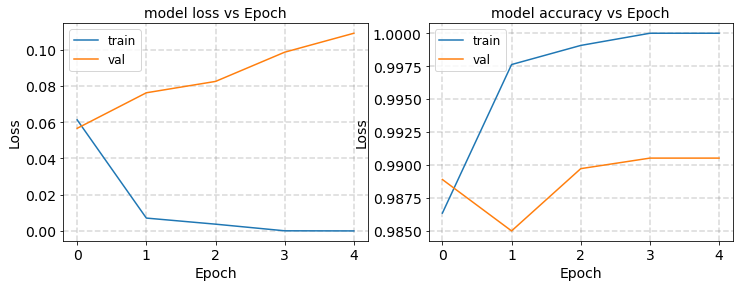

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1147 - accuracy: 0.9764 - val_loss: 0.0410 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 2s - loss: 0.0097 - accuracy: 0.9970 - val_loss: 0.0488 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 2s - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0552 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 2s - loss: 2.6351e-04 - accuracy: 0.9999 - val_loss: 0.0523 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 1.7535e-05 - accuracy: 1.0000 - val_loss: 0.0591 - val_accuracy: 0.9898


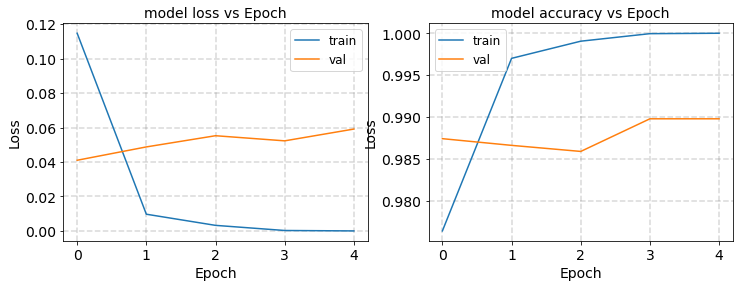

8
Epoch 1/5
1250/1250 - 2s - loss: 0.1234 - accuracy: 0.9684 - val_loss: 0.0513 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 2s - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0749 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 2s - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0717 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 2s - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.0815 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 2s - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.1121 - val_accuracy: 0.9874


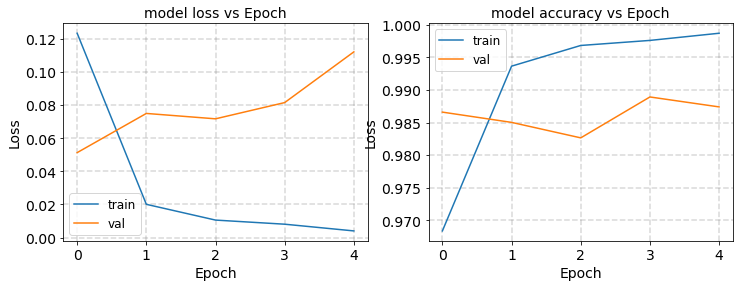

round1 [3 8 2 9]
3
Epoch 1/5
1250/1250 - 2s - loss: 0.1329 - accuracy: 0.9683 - val_loss: 0.0611 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0604 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 3s - loss: 0.0074 - accuracy: 0.9975 - val_loss: 0.0675 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 3s - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0684 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 3s - loss: 4.7227e-04 - accuracy: 0.9998 - val_loss: 0.0921 - val_accuracy: 0.9874


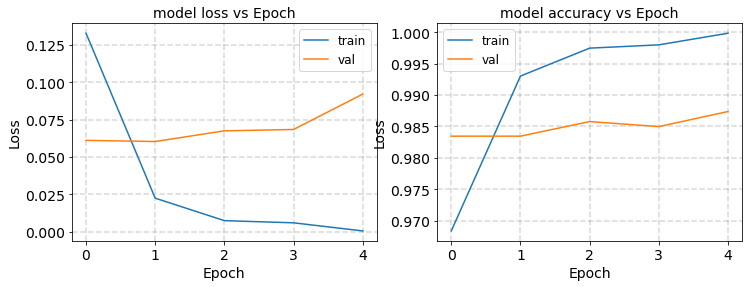

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1039 - accuracy: 0.9749 - val_loss: 0.0600 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0121 - accuracy: 0.9967 - val_loss: 0.0994 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 3s - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.1010 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.1096 - val_accuracy: 0.9849
Epoch 5/5
1250/1250 - 3s - loss: 0.0065 - accuracy: 0.9982 - val_loss: 0.1138 - val_accuracy: 0.9842


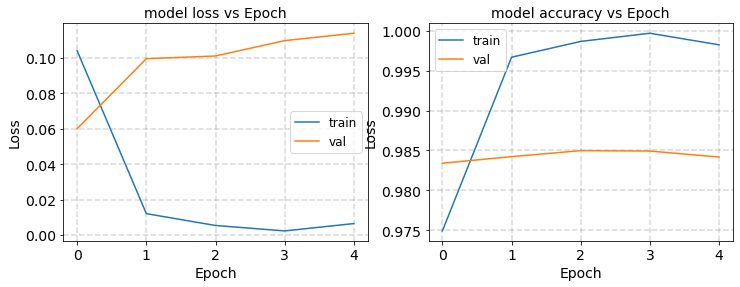

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1374 - accuracy: 0.9729 - val_loss: 0.0507 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 3s - loss: 0.0109 - accuracy: 0.9970 - val_loss: 0.0605 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 3s - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.0383 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0431 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0528 - val_accuracy: 0.9905


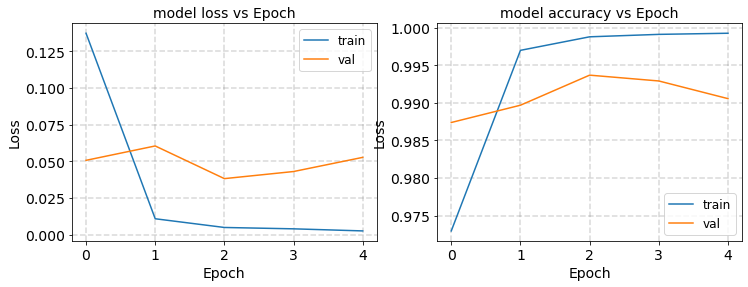

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0699 - accuracy: 0.9855 - val_loss: 0.0558 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 3s - loss: 0.0061 - accuracy: 0.9984 - val_loss: 0.0593 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0670 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 7.1627e-05 - accuracy: 1.0000 - val_loss: 0.0784 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 2s - loss: 2.3874e-05 - accuracy: 1.0000 - val_loss: 0.0878 - val_accuracy: 0.9890


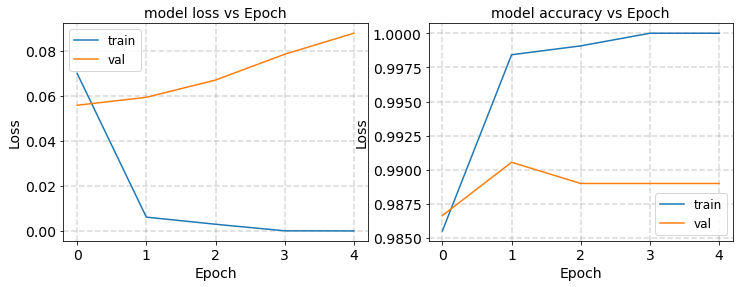

round2 [8 2 9 3]
8
Epoch 1/5
1250/1250 - 4s - loss: 0.1146 - accuracy: 0.9690 - val_loss: 0.0563 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 4s - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0793 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 3s - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0880 - val_accuracy: 0.9841
Epoch 4/5
1250/1250 - 3s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.1055 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 4s - loss: 8.6375e-05 - accuracy: 1.0000 - val_loss: 0.1186 - val_accuracy: 0.9865


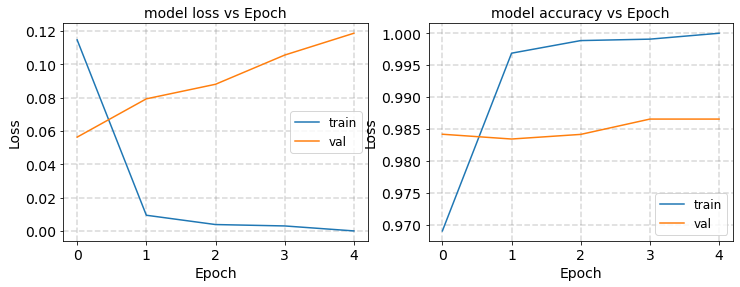

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0977 - accuracy: 0.9797 - val_loss: 0.0435 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 3s - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0550 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0803 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0655 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 3.6159e-04 - accuracy: 0.9998 - val_loss: 0.0754 - val_accuracy: 0.9890


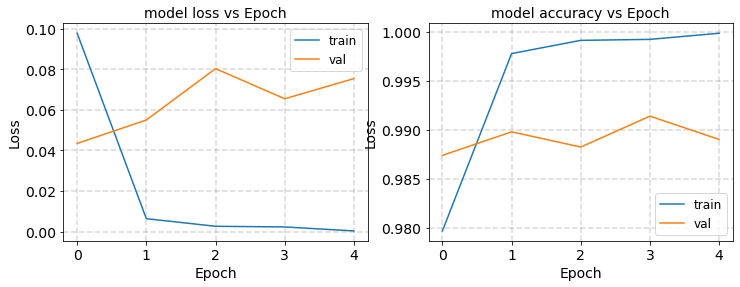

9
Epoch 1/5
1250/1250 - 3s - loss: 0.1164 - accuracy: 0.9763 - val_loss: 0.0675 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 3s - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.0884 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 3s - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0867 - val_accuracy: 0.9835
Epoch 4/5
1250/1250 - 3s - loss: 4.0225e-04 - accuracy: 0.9999 - val_loss: 0.1293 - val_accuracy: 0.9859
Epoch 5/5
1250/1250 - 3s - loss: 3.7592e-05 - accuracy: 1.0000 - val_loss: 0.1472 - val_accuracy: 0.9851


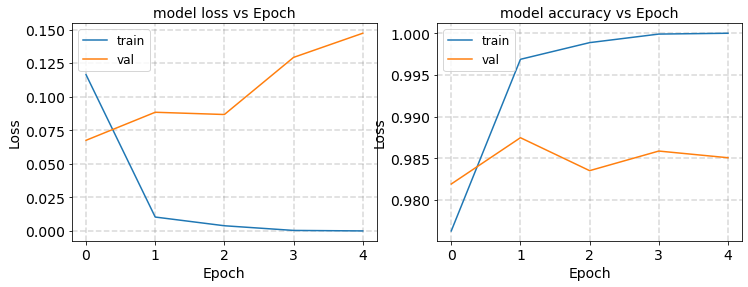

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1433 - accuracy: 0.9726 - val_loss: 0.0825 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 3s - loss: 0.0235 - accuracy: 0.9927 - val_loss: 0.0784 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 3s - loss: 0.0099 - accuracy: 0.9972 - val_loss: 0.1129 - val_accuracy: 0.9794
Epoch 4/5
1250/1250 - 3s - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.0991 - val_accuracy: 0.9803
Epoch 5/5
1250/1250 - 4s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1020 - val_accuracy: 0.9818


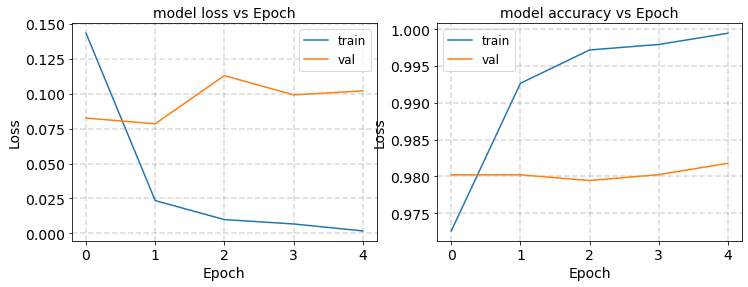

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_49 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_50 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_51 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
_________________________________________________

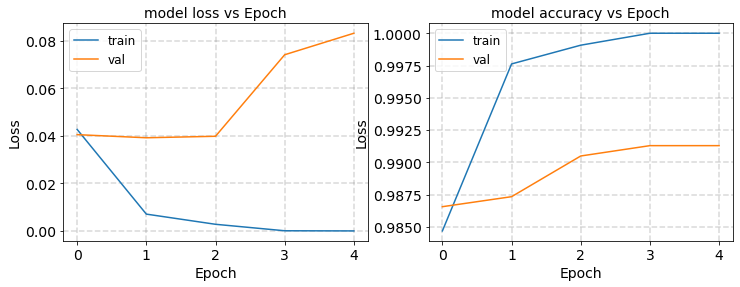

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0995 - accuracy: 0.9752 - val_loss: 0.0512 - val_accuracy: 0.9812
Epoch 2/5
1250/1250 - 3s - loss: 0.0161 - accuracy: 0.9956 - val_loss: 0.0677 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 3s - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0648 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0874 - val_accuracy: 0.9827
Epoch 5/5
1250/1250 - 3s - loss: 1.9062e-04 - accuracy: 1.0000 - val_loss: 0.1184 - val_accuracy: 0.9819


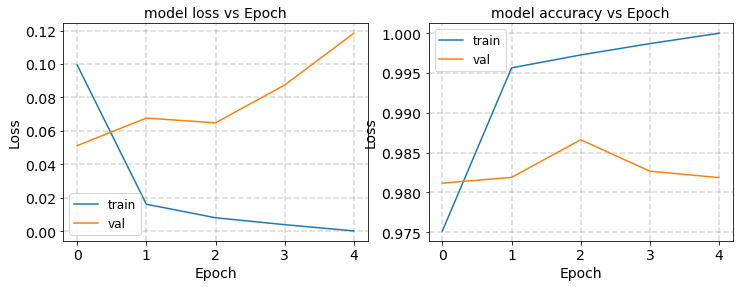

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1150 - accuracy: 0.9711 - val_loss: 0.0671 - val_accuracy: 0.9786
Epoch 2/5
1250/1250 - 3s - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0686 - val_accuracy: 0.9786
Epoch 3/5
1250/1250 - 3s - loss: 0.0111 - accuracy: 0.9963 - val_loss: 0.1113 - val_accuracy: 0.9747
Epoch 4/5
1250/1250 - 3s - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0802 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.1230 - val_accuracy: 0.9794


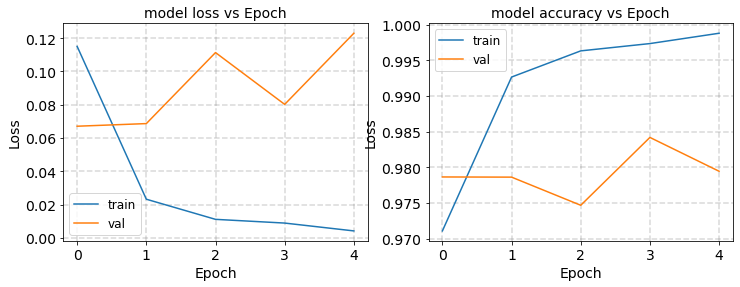

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0947 - accuracy: 0.9757 - val_loss: 0.0493 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 0.0206 - accuracy: 0.9941 - val_loss: 0.0553 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 3s - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.0442 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.0755 - val_accuracy: 0.9827
Epoch 5/5
1250/1250 - 3s - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0682 - val_accuracy: 0.9906


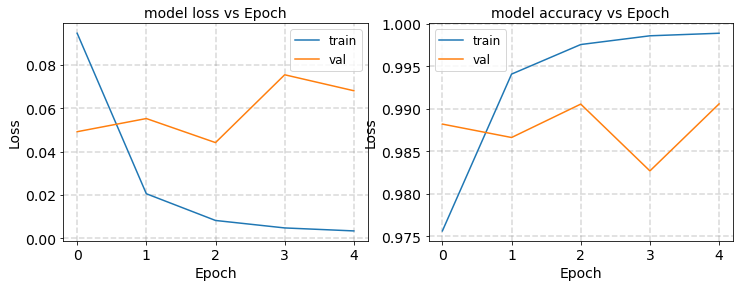

round1 [3 8 2 9]
3
Epoch 1/5
1250/1250 - 3s - loss: 0.0881 - accuracy: 0.9781 - val_loss: 0.0870 - val_accuracy: 0.9763
Epoch 2/5
1250/1250 - 3s - loss: 0.0150 - accuracy: 0.9959 - val_loss: 0.0971 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 3s - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.1481 - val_accuracy: 0.9771
Epoch 4/5
1250/1250 - 3s - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.1218 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 2s - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.1527 - val_accuracy: 0.9818


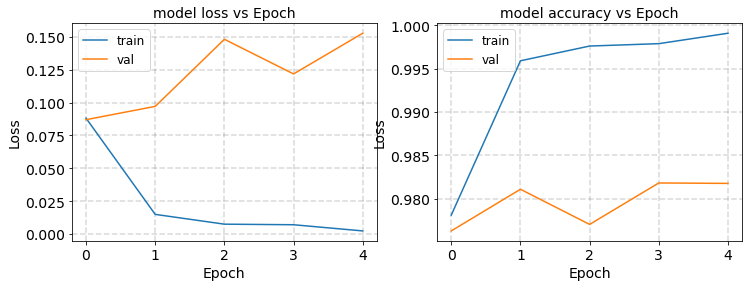

8
Epoch 1/5
1250/1250 - 2s - loss: 0.1445 - accuracy: 0.9531 - val_loss: 0.0755 - val_accuracy: 0.9747
Epoch 2/5
1250/1250 - 3s - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.0877 - val_accuracy: 0.9787
Epoch 3/5
1250/1250 - 3s - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0922 - val_accuracy: 0.9819
Epoch 4/5
1250/1250 - 3s - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0839 - val_accuracy: 0.9843
Epoch 5/5
1250/1250 - 3s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0968 - val_accuracy: 0.9843


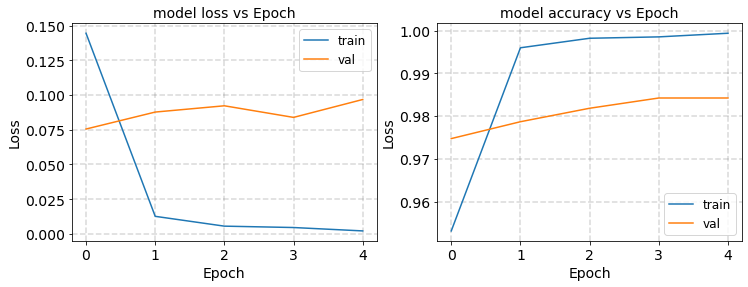

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1014 - accuracy: 0.9830 - val_loss: 0.0522 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 3s - loss: 0.0089 - accuracy: 0.9976 - val_loss: 0.0587 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0915 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 3s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0882 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 3s - loss: 1.2297e-04 - accuracy: 1.0000 - val_loss: 0.1003 - val_accuracy: 0.9858


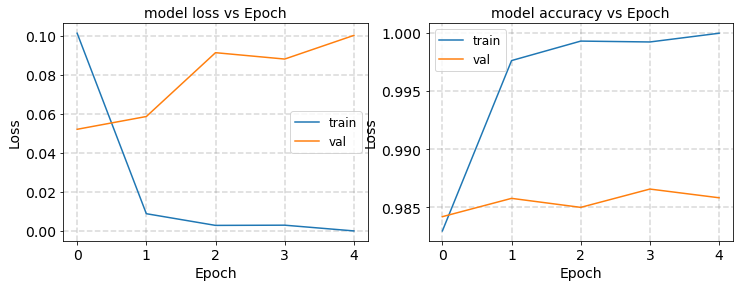

9
Epoch 1/5
1250/1250 - 3s - loss: 0.1189 - accuracy: 0.9738 - val_loss: 0.0730 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0100 - accuracy: 0.9972 - val_loss: 0.0963 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.1182 - val_accuracy: 0.9803
Epoch 4/5
1250/1250 - 3s - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.1301 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 3s - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0964 - val_accuracy: 0.9796


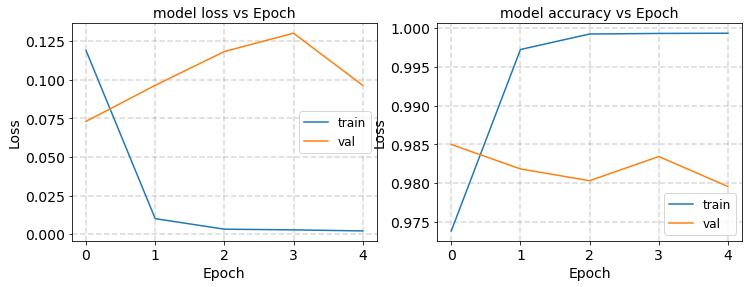

round2 [8 9 2 3]
8
Epoch 1/5
1250/1250 - 3s - loss: 0.0967 - accuracy: 0.9695 - val_loss: 0.0556 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 3s - loss: 0.0110 - accuracy: 0.9959 - val_loss: 0.0721 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 3s - loss: 0.0051 - accuracy: 0.9981 - val_loss: 0.0930 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0731 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 6.0173e-04 - accuracy: 0.9998 - val_loss: 0.0866 - val_accuracy: 0.9858


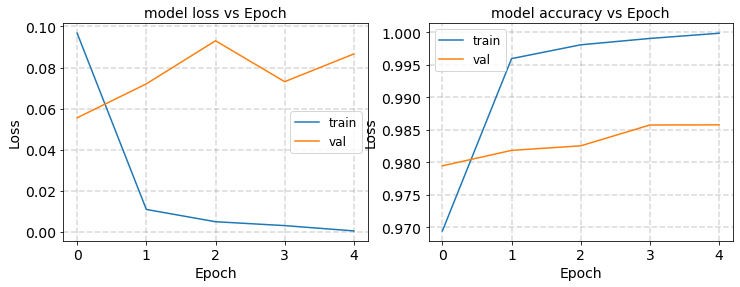

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0900 - accuracy: 0.9855 - val_loss: 0.0586 - val_accuracy: 0.9841
Epoch 2/5
1250/1250 - 3s - loss: 0.0100 - accuracy: 0.9966 - val_loss: 0.0945 - val_accuracy: 0.9827
Epoch 3/5
1250/1250 - 3s - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0784 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.1101 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.1419 - val_accuracy: 0.9857


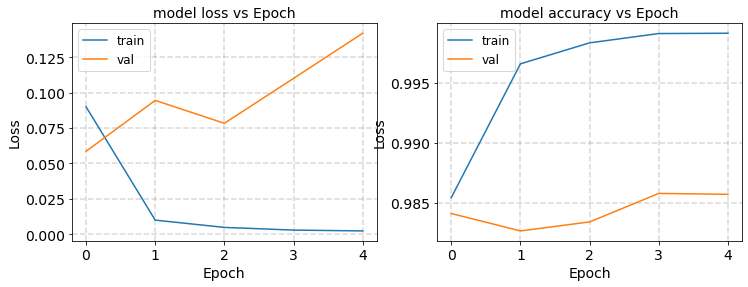

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1381 - accuracy: 0.9647 - val_loss: 0.0576 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0479 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 3s - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0772 - val_accuracy: 0.9896
Epoch 4/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0644 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 3s - loss: 8.9706e-04 - accuracy: 0.9997 - val_loss: 0.0664 - val_accuracy: 0.9913


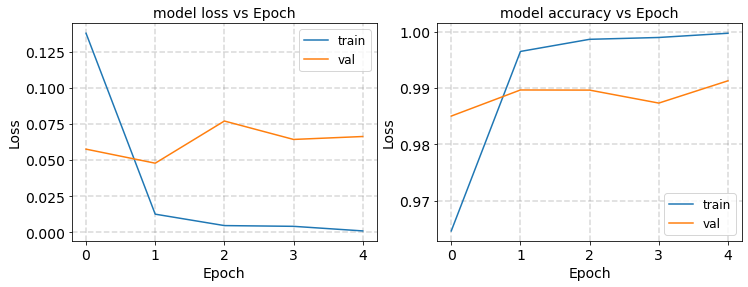

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1214 - accuracy: 0.9777 - val_loss: 0.0670 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 3s - loss: 0.0125 - accuracy: 0.9966 - val_loss: 0.0939 - val_accuracy: 0.9795
Epoch 3/5
1250/1250 - 3s - loss: 0.0080 - accuracy: 0.9978 - val_loss: 0.1056 - val_accuracy: 0.9787
Epoch 4/5
1250/1250 - 3s - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.1257 - val_accuracy: 0.9786
Epoch 5/5
1250/1250 - 3s - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.1417 - val_accuracy: 0.9794


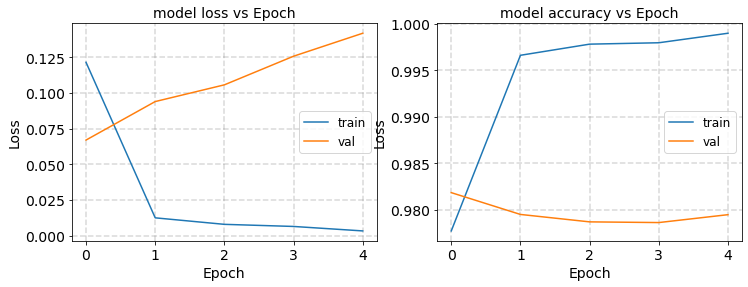

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_55 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_56 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_57 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
_________________________________________________

In [5]:
%%time
series = [2,3,8,9]
num_runs = 10
name = '2389_seq_prune_0_4_64_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=64,
                                  num_output_nodes=4,
                                  pruning=None,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [6]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_0_4_64_run0  1.93828         1.93182      0.0519686   
2389_seq_prune_0_4_64_run1  1.94745         1.95693      0.0137846   
2389_seq_prune_0_4_64_run2  1.90422         1.92503      0.0290223   
2389_seq_prune_0_4_64_run3  1.92662         1.93103      0.0202187   
2389_seq_prune_0_4_64_run4  1.95384         1.95249      0.0108021   
2389_seq_prune_0_4_64_run5  1.96919         1.95213      0.0164623   
2389_seq_prune_0_4_64_run6  1.87965         1.88075       0.013443   
2389_seq_prune_0_4_64_run7  1.92765         1.91341      0.0114245   
2389_seq_prune_0_4_64_run8  1.95952         1.98057      0.0109529   
2389_seq_prune_0_4_64_run9  1.91374         1.91296       0.010738   

                           Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_0_4_64_run0      0.0116205         50       1           No   
2389_seq_prune_0_4_64_run1     0.00308233         30     0.6           No   
2389_seq_prune_0_4_64_run2     0.00648959         25     0.5           No   
2389_seq_prune_0_4_64_run3     0.00452103         55     0.9           No   
2389_seq_prune_0_4_64_run4     0.00241543         55     0.9           No   
2389_seq_prune_0_4_64_run5     0.00368108         80     0.4           No   
2389_seq_prune_0_4_64_run6     0.00300596         40     0.8           No   
2389_seq_prune_0_4_64_run7      0.0025546         85     0.3           No   
2389_seq_prune_0_4_64_run8     0.00244915          0       0          Yes   
2389_seq_prune_0_4_64_run9     0.00240109         45     0.9           No   

                           Direction  Accuracy  
2389_seq_prune_0_4_64_run0    larger   0.92585  
2389_seq_prune_0_4_64_run1   smaller  0.962875  
2389_seq_prune_0_4_64_run2   smaller  0.899325  
2389_seq_prune_0_4_64_run3    larger  0.944875  
2389_seq_prune_0_4_64_run4    larger  0.911675  
2389_seq_prune_0_4_64_run5    larger   0.93375  
2389_seq_prune_0_4_64_run6   smaller  0.918675  
2389_seq_prune_0_4_64_run7    larger    0.9188  
2389_seq_prune_0_4_64_run8   smaller  0.938425  
2389_seq_prune_0_4_64_run9   smaller    0.9464

#### Save dataframe

In [7]:
import pickle

with open('df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open('df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_0_4_64_run0  1.93828         1.93182      0.0519686   
2389_seq_prune_0_4_64_run1  1.94745         1.95693      0.0137846   
2389_seq_prune_0_4_64_run2  1.90422         1.92503      0.0290223   
2389_seq_prune_0_4_64_run3  1.92662         1.93103      0.0202187   
2389_seq_prune_0_4_64_run4  1.95384         1.95249      0.0108021   
2389_seq_prune_0_4_64_run5  1.96919         1.95213      0.0164623   
2389_seq_prune_0_4_64_run6  1.87965         1.88075       0.013443   
2389_seq_prune_0_4_64_run7  1.92765         1.91341      0.0114245   
2389_seq_prune_0_4_64_run8  1.95952         1.98057      0.0109529   
2389_seq_prune_0_4_64_run9  1.91374         1.91296       0.010738   

                           Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_0_4_64_run0      0.0116205         50       1           No   
2389_seq_prune_0_4_64_run1     0.00308233         30     0.6           No   
2389_seq_prune_0_4_64_run2     0.00648959         25     0.5           No   
2389_seq_prune_0_4_64_run3     0.00452103         55     0.9           No   
2389_seq_prune_0_4_64_run4     0.00241543         55     0.9           No   
2389_seq_prune_0_4_64_run5     0.00368108         80     0.4           No   
2389_seq_prune_0_4_64_run6     0.00300596         40     0.8           No   
2389_seq_prune_0_4_64_run7      0.0025546         85     0.3           No   
2389_seq_prune_0_4_64_run8     0.00244915          0       0          Yes   
2389_seq_prune_0_4_64_run9     0.00240109         45     0.9           No   

                           Direction  Accuracy  
2389_seq_prune_0_4_64_run0    larger   0.92585  
2389_seq_prune_0_4_64_run1   smaller  0.962875  
2389_seq_prune_0_4_64_run2   smaller  0.899325  
2389_seq_prune_0_4_64_run3    larger  0.944875  
2389_seq_prune_0_4_64_run4    larger  0.911675  
2389_seq_prune_0_4_64_run5    larger   0.93375  
2389_seq_prune_0_4_64_run6   smaller  0.918675  
2389_seq_prune_0_4_64_run7    larger    0.9188  
2389_seq_prune_0_4_64_run8   smaller  0.938425  
2389_seq_prune_0_4_64_run9   smaller    0.9464

In [8]:
df_models[0].layers[1].get_weights()[0]

array([[-0.05161159,  0.06059691, -0.04909357, ...,  0.05103188,
        -0.049777  ,  0.00327957],
       [-0.00421495,  0.0315377 , -0.07345802, ...,  0.02670606,
         0.02418658,  0.04574455],
       [-0.02094968,  0.05461643, -0.08203354, ..., -0.03576669,
         0.01992035, -0.05853191],
       ...,
       [ 0.02449055, -0.07851938,  0.06948813, ..., -0.06468836,
         0.00221627, -0.05705002],
       [-0.03376302, -0.04817027,  0.08048563, ..., -0.00476702,
        -0.03293285,  0.04686814],
       [ 0.05237363,  0.04034714,  0.00313282, ..., -0.05634189,
        -0.0775322 , -0.03008168]], dtype=float32)

#### Look at results of first experiment

In [9]:
for val in exp_dict[name + str(0)]:
    print(val)

1.9382838056609053
1.93181776137327
0.0519685654502677
0.011620524503994553
50.0
1.0
No
larger
0.925849974155426
